# **AeroFit Business Case Study**

### **Objective:**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=11BXmk-V557Z016YR5yhyBABUTg3cIqEl' -O AeroFit.csv

--2024-07-15 05:29:02--  https://drive.google.com/uc?export=download&id=11BXmk-V557Z016YR5yhyBABUTg3cIqEl
Resolving drive.google.com (drive.google.com)... 173.194.210.113, 173.194.210.101, 173.194.210.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=11BXmk-V557Z016YR5yhyBABUTg3cIqEl&export=download [following]
--2024-07-15 05:29:02--  https://drive.usercontent.google.com/download?id=11BXmk-V557Z016YR5yhyBABUTg3cIqEl&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.11.132, 2607:f8b0:400c:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.11.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [application/octet-stream]
Saving to: ‘AeroFit.csv’

AeroFit.csv         100%[===================>]   7.11K  --.-KB/s  

In [ ]:
df= pd.read_csv('AeroFit.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.shape

(180, 9)

In [ ]:
df.ndim

2

### **Features of the dataset:**
- `Product Purchased:` 	KP281, KP481, or KP781
- `Age:`	In years
- `Gender:`	Male/Female
- `Education:`	In years
- `MaritalStatus:`	Single or partnered
- `Usage:`	The average number of times the customer plans to use the treadmill each week.
- `Income:`	Annual income (in $)
- `Fitness:`	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- `Miles:`	The average number of miles the customer expects to walk/run each week

Product Portfolio:

- The `KP281` is an entry-level treadmill that sells for `$1,500.`

- The `KP481` is for mid-level runners that sell for `$1,750.`

- The `KP781` treadmill is having advanced features that sell for ` $2,500.`



---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


### **Insights:**
1. `Age ` - The age range of customers spans from **18 to 50** year, with an average age of **29** years.

2. `Education ` - Customer education levels vary between **12 and 21** years, with an average education duration of **16** years.

3. `Usage ` - Customers intend to utilize the product anywhere from **2 to 7** times per week, with an average usage frequency of **3 to 4** times per week.

4. `Fitness` - On average, customers have rated their fitness at **3** on a range of **5** points, reflecting a moderate level of fitness.

5. `Income` - The annual income of customers falls within the range of **USD 30,000 to USD 100,000**, with an average income of approximately USD **54,000**.

6. `Miles` - Customers' weekly running goals range from **21 to 360** miles, with an average target of **103 miles per week**

In [ ]:
df.describe(include=object).T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


### **Insights:**
1. `Product` - **KP281** is the top product in sales in the duration of 3 months
2. `Gender` - Most of the customers are **male** to buy products in 3 months
3. `Marital Status` - Most of the customers are **married** to bu products in the last 3 months



---



Checking all the columns and whether there are any null values

In [ ]:
#Checking unique values for Product column
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
#Checking null values for Product column
df['Product'].isna().sum()

0

In [ ]:
#Checking unique values for Age column
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
#Checking null values for Age column
df['Age'].isna().sum()

0

In [ ]:
#Checking unique values for Gender column
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
#Checking null values for Gender column
df['Gender'].isna().sum()

0

In [ ]:
#Checking unique values for Education column
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [ ]:
#Checking null values for Education column
df['Education'].isna().sum()

0

In [ ]:
#Checking unique values for Marital status column
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [ ]:
#Checking null values for Product column
df['MaritalStatus'].isna().sum()

0

In [ ]:
#Checking unique values for Usage column
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [ ]:
#Checking null values for MaritalStatus column
df['Usage'].isna().sum()

0

In [ ]:
#Checking unique values for Fitness column
df['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [ ]:
#Checking null values for Fitness column
df['Fitness'].isna().sum()

0

In [ ]:
#Checking unique values for Income column
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [ ]:
#Checking null values for Income column
df['Income'].isna().sum()

0

In [ ]:
#Checking unique values for Miles column
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

In [ ]:
#Checking null values for Miles column
df['Miles'].isna().sum()

0

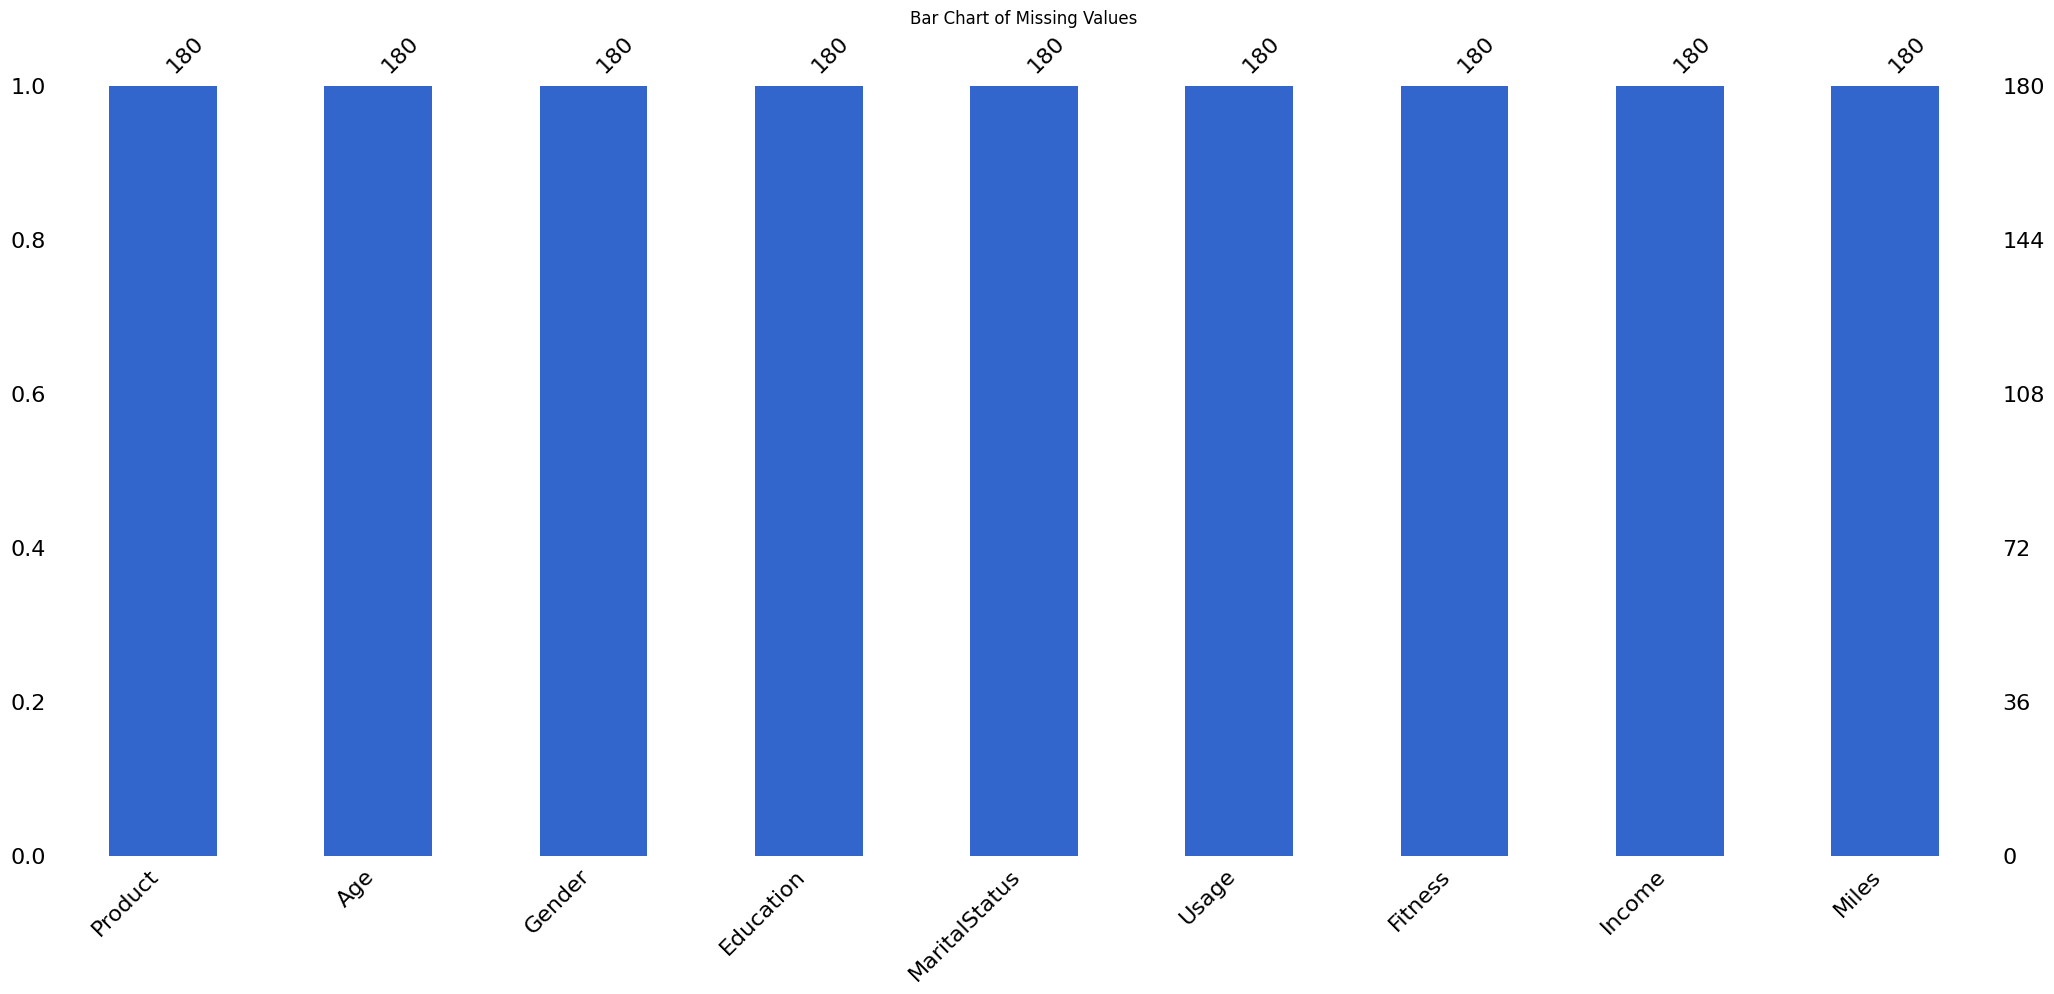

In [ ]:
import missingno as msno
msno.bar(df,color=(0.2, 0.4, 0.8))
plt.title('Bar Chart of Missing Values')
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2847: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


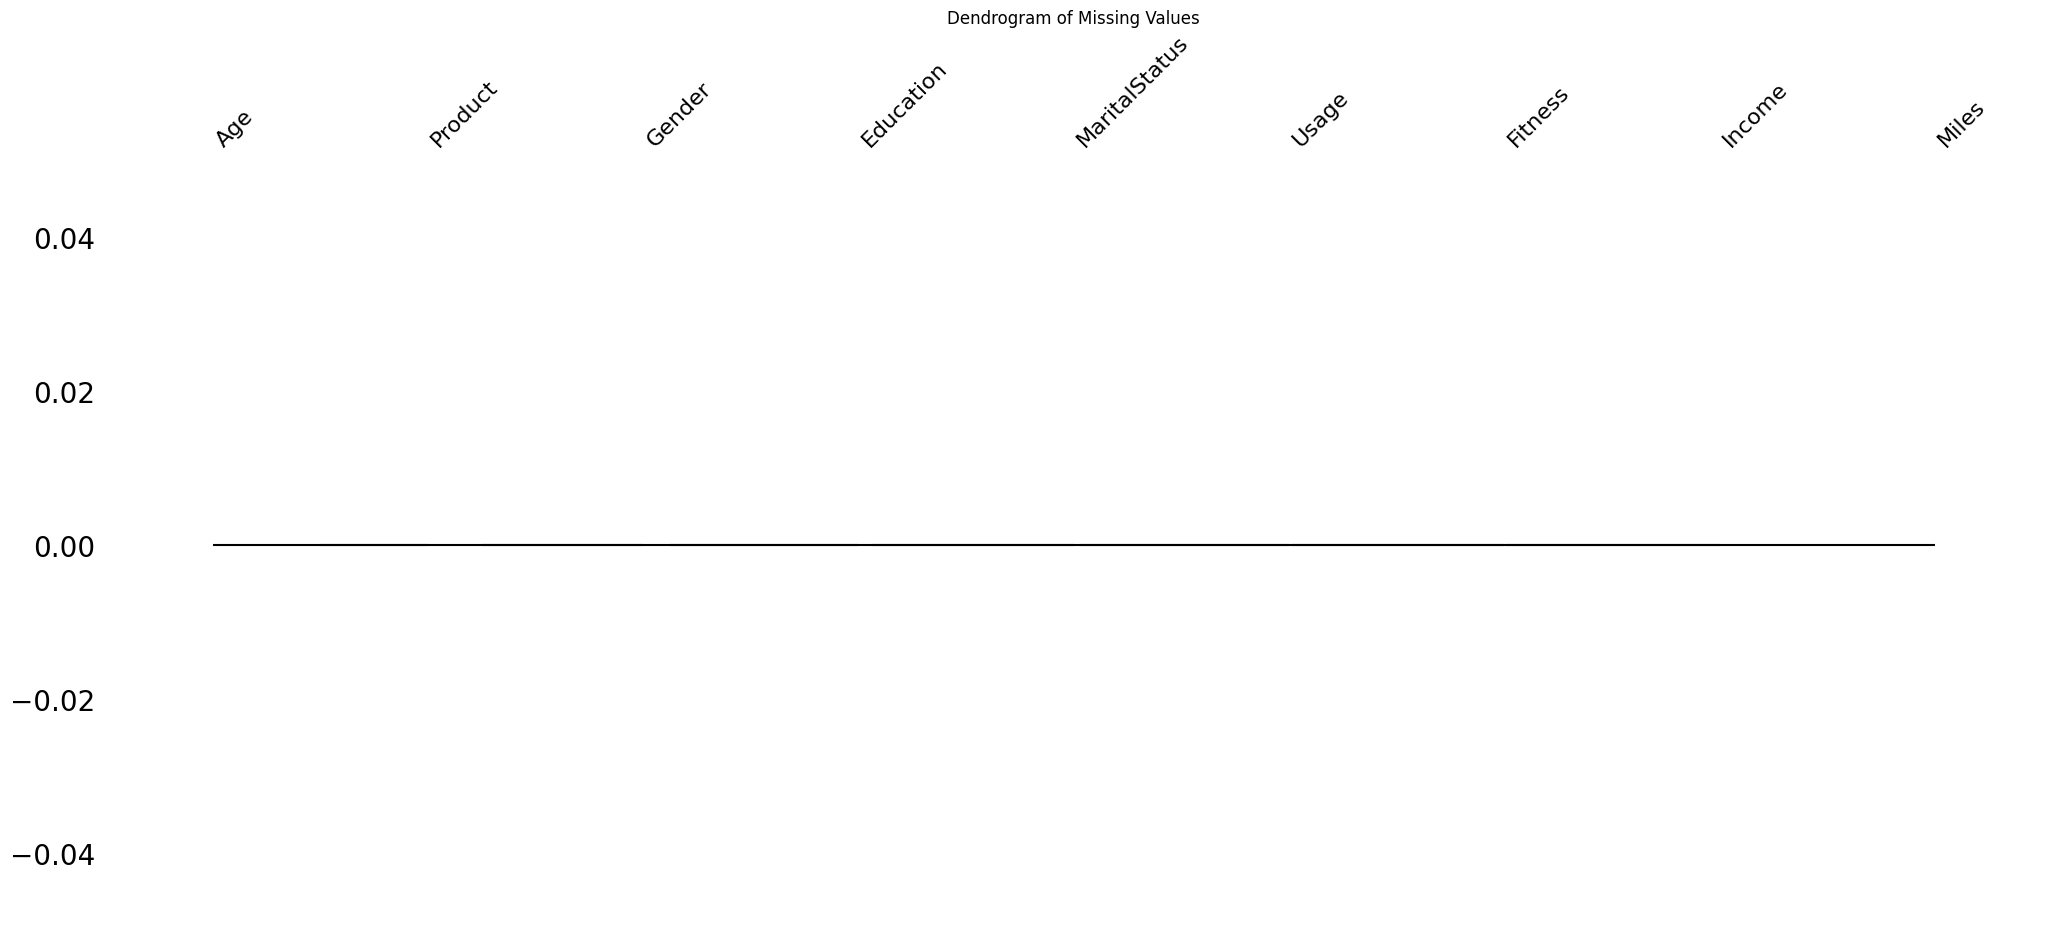

In [ ]:
msno.dendrogram(df)
plt.title('Dendrogram of Missing Values')
plt.show()

The line from the above plot shows that there are no null values in the dataset



---



### **Duplicate Detection**

In [ ]:
df.duplicated().sum()

0

No duplicates found in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB




---



## **Univariate - categorical**

In [ ]:
#Categorical columns in the dataset are Product, Gender, MaritalStatus
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [ ]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [ ]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

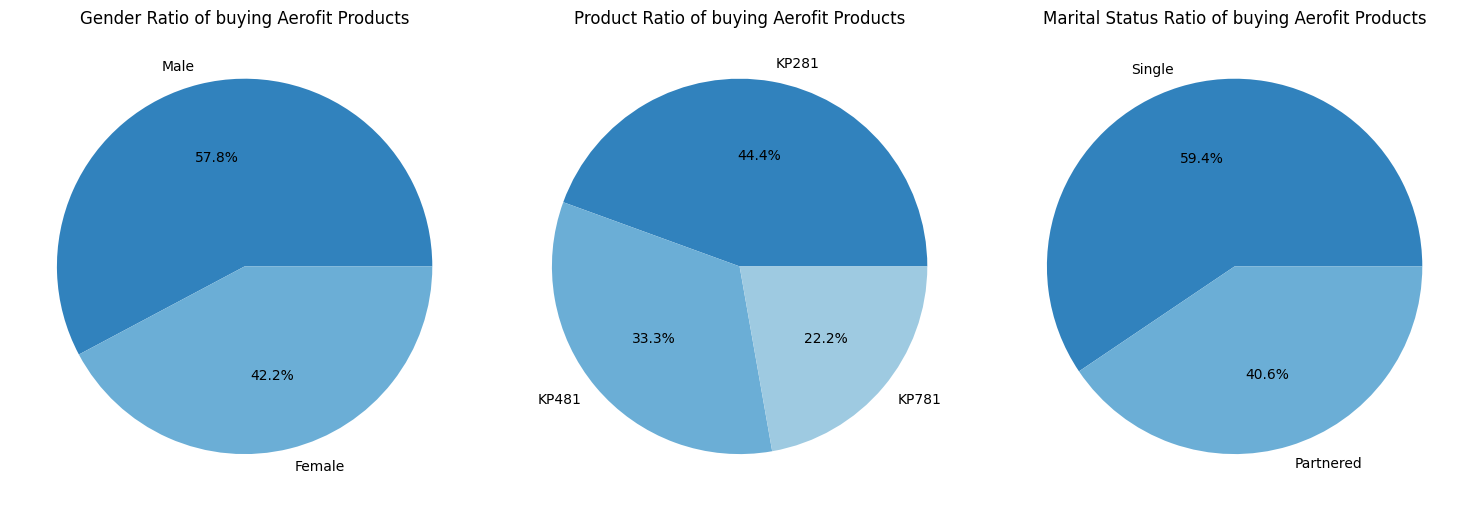

In [ ]:
colors = plt.get_cmap('tab20c').colors

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',colors=colors[:len(df['Gender'].value_counts())])
plt.title('Gender Ratio of buying Aerofit Products')


plt.subplot(1,3,2)
plt.pie(df['Product'].value_counts(),labels=['KP281','KP481','KP781'],autopct='%1.1f%%',colors=colors[:len(df['Product'].value_counts())])
plt.title('Product Ratio of buying Aerofit Products')


plt.subplot(1,3,3)
plt.pie(df['MaritalStatus'].value_counts(),labels=['Single','Partnered'],autopct='%1.1f%%',colors=colors[:len(df['MaritalStatus'].value_counts())])
plt.title('Marital Status Ratio of buying Aerofit Products')

plt.tight_layout()
plt.show()



### **Insights:**
- **Majority Male Buyers:**

  - 57.8% of the purchasers are male, indicating that a majority of Aerofit product buyers are men.
- **Significant Female Buyers:**

  - 42.2% of the purchasers are female, showing that a significant portion of the customer base is female, although less than the male percentage.

- **Most Popular Product (KP281):**

   - 44.4% of the purchases are of the KP281 product, making it the most popular among the three products as it is the cheapest product available in the company.
- **Moderately Popular Product (KP481):**

   - 33.3% of the purchases are of the KP481 product, indicating that it is also fairly popular but less so than KP281.
- **Least Popular Product (KP781):**

   - 22.2% of the purchases are of the KP781 product, making it the least popular among the three as it is the most expensive product available in the company.
- **Majority Single Buyers:**

  - 59.4% of the purchasers are single, indicating that a majority of Aerofit product buyers are not in a partnered relationship.
- **Significant Partnered Buyers:**

   - 40.6% of the purchasers are partnered, showing that a substantial portion of the customer base is in a relationship.



---



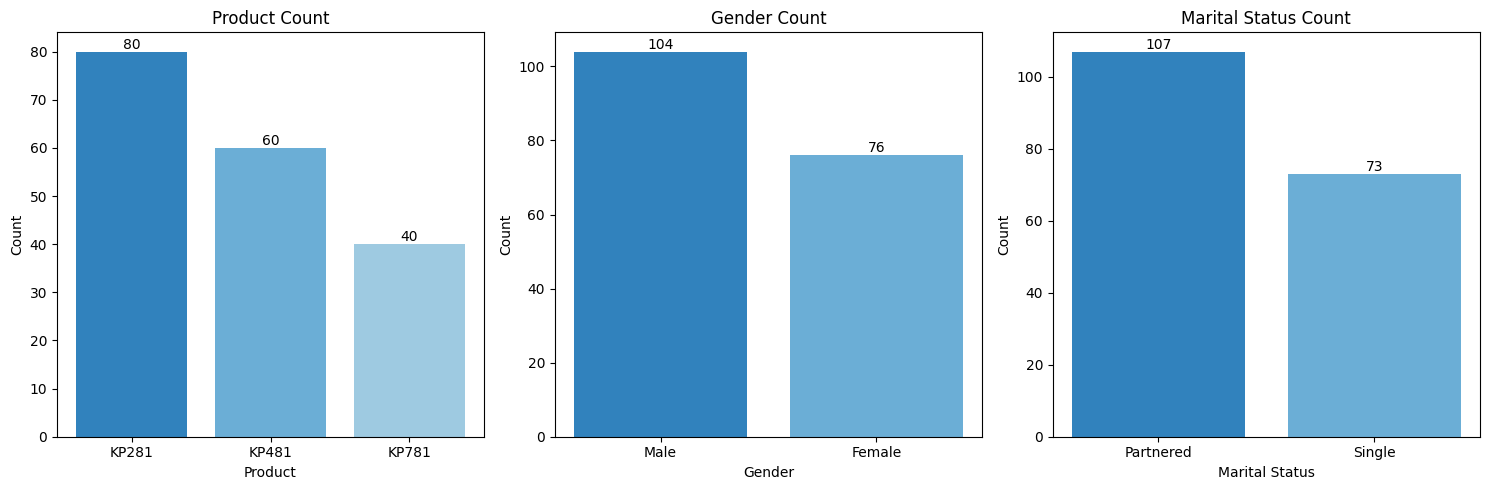

In [ ]:
# Barplot for categorical columns


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
bars= plt.bar(df['Product'].value_counts().index,df['Product'].value_counts(),color = plt.get_cmap('tab20c').colors)
plt.title('Product Count')
plt.xlabel('Product')
plt.ylabel('Count')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval),ha='center', va='bottom')  # Adding numbers on bars


plt.subplot(1,3,2)
bars=plt.bar(df['Gender'].value_counts().index,df['Gender'].value_counts(),color = plt.get_cmap('tab20c').colors)
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval),ha='center', va='bottom')

plt.subplot(1,3,3)
bars=plt.bar(df['MaritalStatus'].value_counts().index,df['MaritalStatus'].value_counts(),color = plt.get_cmap('tab20c').colors)
plt.title('Marital Status Count')
plt.xlabel('Marital Status')
plt.ylabel('Count')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval),ha='center', va='bottom',)
plt.tight_layout()
plt.show()



- **Product Popularity:**

 **KP781** is the most popular product with the highest count of **80**, followed by **KP281** with **60**, and **KP481** with **48**.
- **Gender Distribution:**

 There are more **males** (104) than **females** (76) represented in the data.
- Marital Status:

 **Single** individuals (73) outnumber **partnered** ones (37), suggesting a higher purchase rate among singles.



---



## **Univariate - Numerical**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


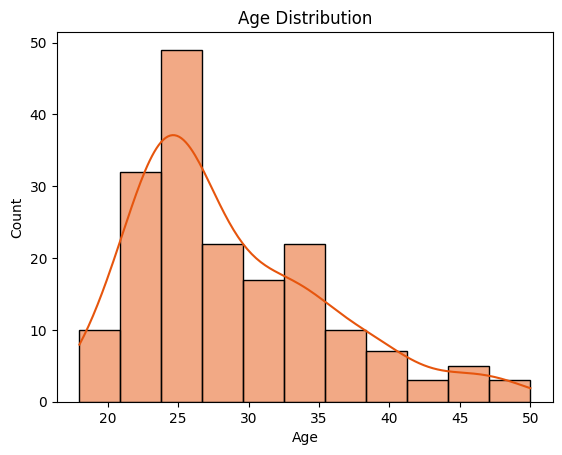

In [ ]:
sns.histplot(x='Age',data=df,kde=True,color=plt.get_cmap('tab20c').colors[4])
plt.title('Age Distribution')
plt.show()

**Insights:**
- **Peak Age Group:**

   - The most significant number of individuals falls within the 25-30 years age range, as indicated by the peak count exceeding 50.

- **Trend Analysis:**

  - The line graph shows a smoothed trend, peaking around the same age group and then gradually declining, suggesting a decrease in the represented demographic as age increases.

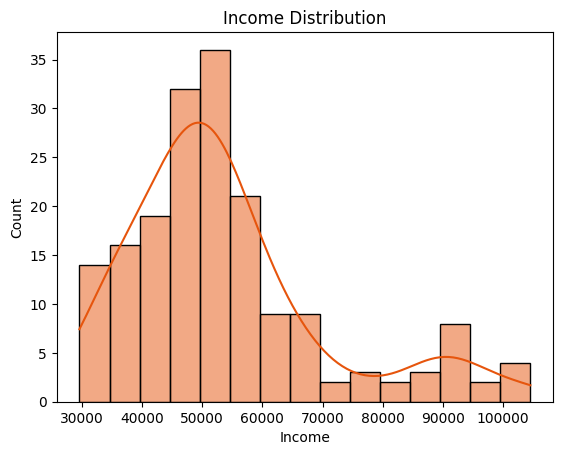

In [ ]:
sns.histplot(x='Income',data=df,kde=True,color=plt.get_cmap('tab20c').colors[4])
plt.title('Income Distribution')
plt.show()

**Insights:**
- **Most Common Income Range:**
  - The majority of individuals earn between `$50,000 and $60,000`. This is indicated by the tallest bar and the peak of the line graph.

<ipython-input-39-d964c9380b43>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Age', data=df,palette=color ,width=0.5)


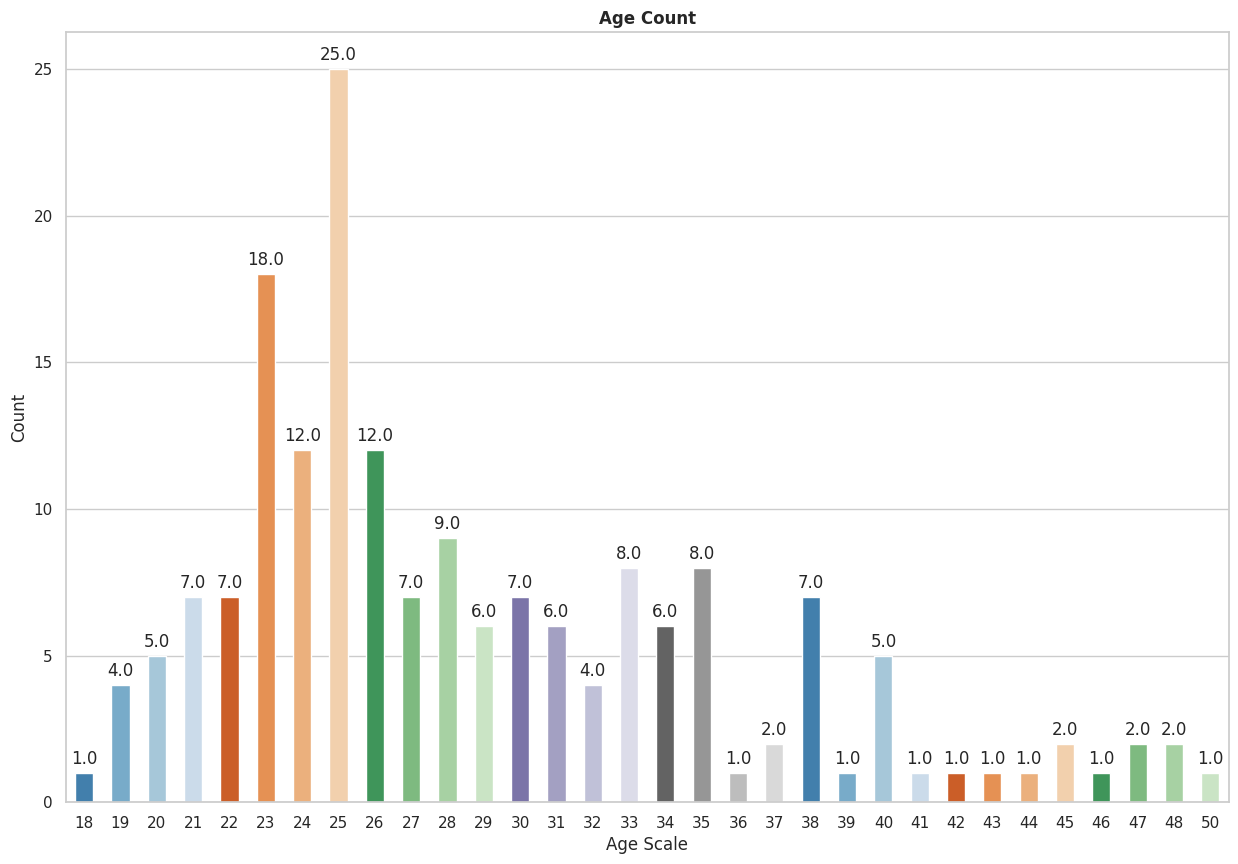

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
color = plt.get_cmap('tab20c').colors

ax = sns.countplot(x='Age', data=df,palette=color ,width=0.5)

# Add title and labels
plt.title('Age Count', weight='bold')
plt.xlabel('Age Scale')
plt.ylabel('Count')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**Insights:**
- Age scale of 25 there are many people who works out using threadmill.

<ipython-input-40-078b46c6e4dc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Education', data=df,palette=color ,width=0.5)


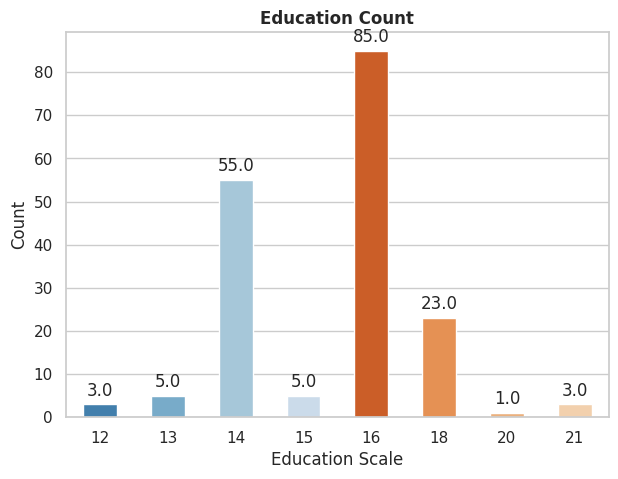

In [ ]:
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
color = plt.get_cmap('tab20c').colors

ax = sns.countplot(x='Education', data=df,palette=color ,width=0.5)

# Add title and labels
plt.title('Education Count', weight='bold')
plt.xlabel('Education Scale')
plt.ylabel('Count')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**Insights:**
- Most educated people who workout has education over 16 years.
- Least educated people who workout has education over 12 years.

<ipython-input-41-dd6949c5f817>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Usage', data=df,palette=color ,width=0.5)


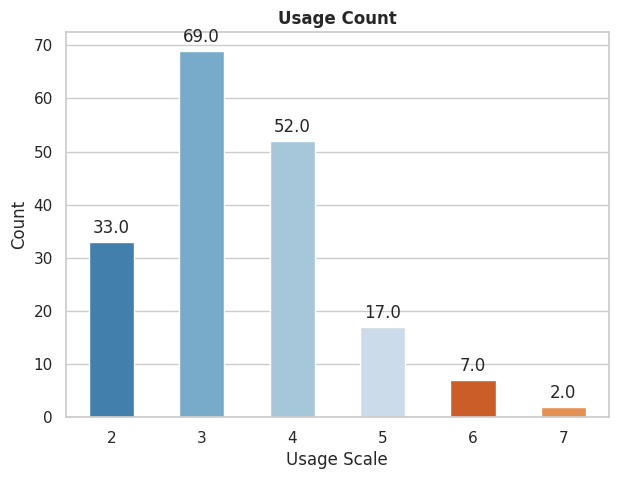

In [ ]:
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
color = plt.get_cmap('tab20c').colors

ax = sns.countplot(x='Usage', data=df,palette=color ,width=0.5)

# Add title and labels
plt.title('Usage Count', weight='bold')
plt.xlabel('Usage Scale')
plt.ylabel('Count')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**Insights:**
- Most of the people workouts 3 times a week frequently and there are 69 people who workouts on threadmill.
- 2 people who are the most focussed to workout on threadmill

<ipython-input-42-397672d00eb5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Fitness', data=df,palette=color ,width=0.5)


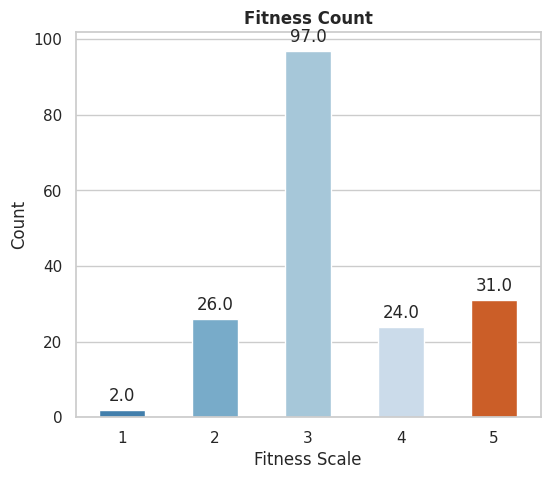

In [ ]:
plt.figure(figsize=(6, 5))
color = plt.get_cmap('tab20c').colors

ax = sns.countplot(x='Fitness', data=df,palette=color ,width=0.5)

# Add title and labels
plt.title('Fitness Count', weight='bold')
plt.xlabel('Fitness Scale')
plt.ylabel('Count')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**Insights:**
- Most of the people are rated 3 out of 5 star

<ipython-input-43-4649a4fbda82>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Miles', data=df,palette=color ,width=0.5)


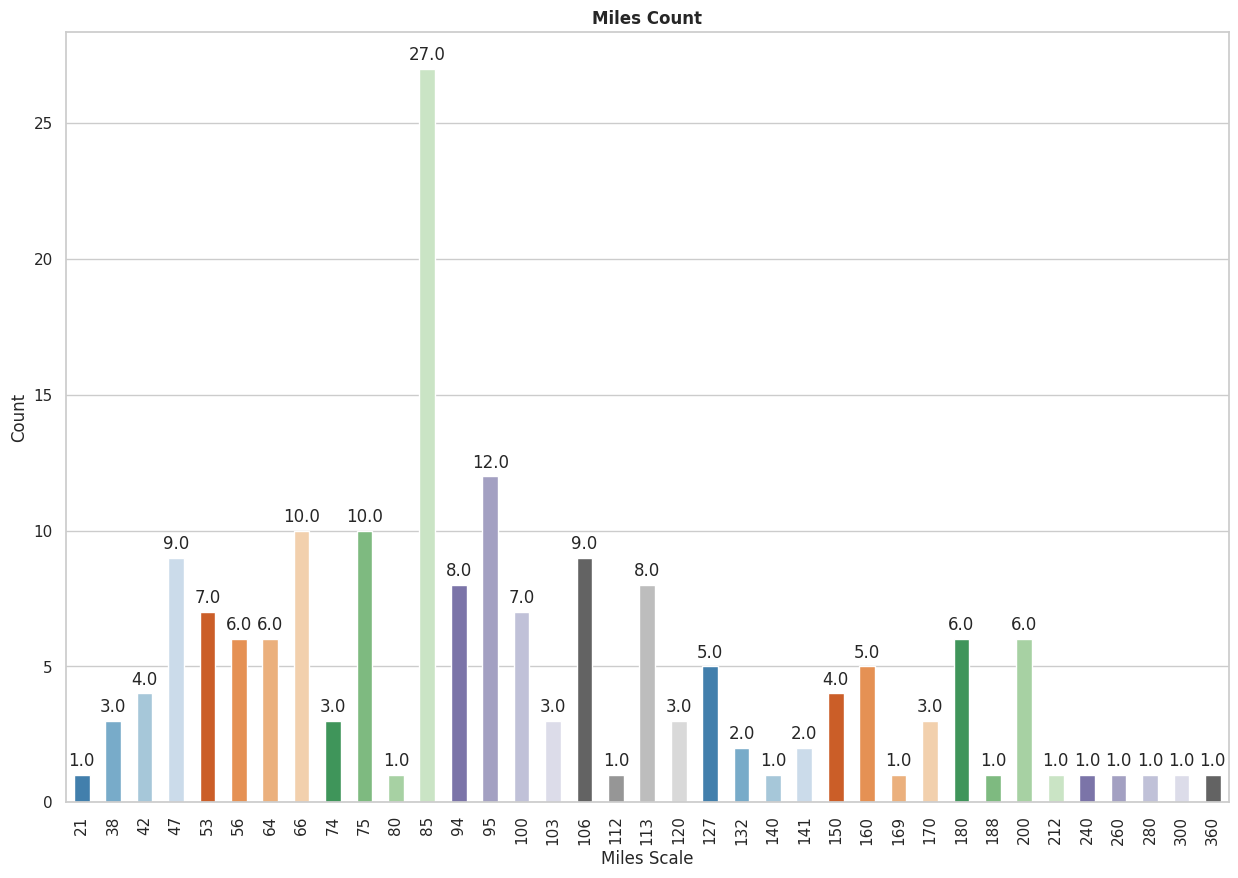

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
color = plt.get_cmap('tab20c').colors

ax = sns.countplot(x='Miles', data=df,palette=color ,width=0.5)

# Add title and labels
plt.title('Miles Count', weight='bold')
plt.xlabel('Miles Scale')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**Insights:**
- 27 people ran around 85 miles in a week.

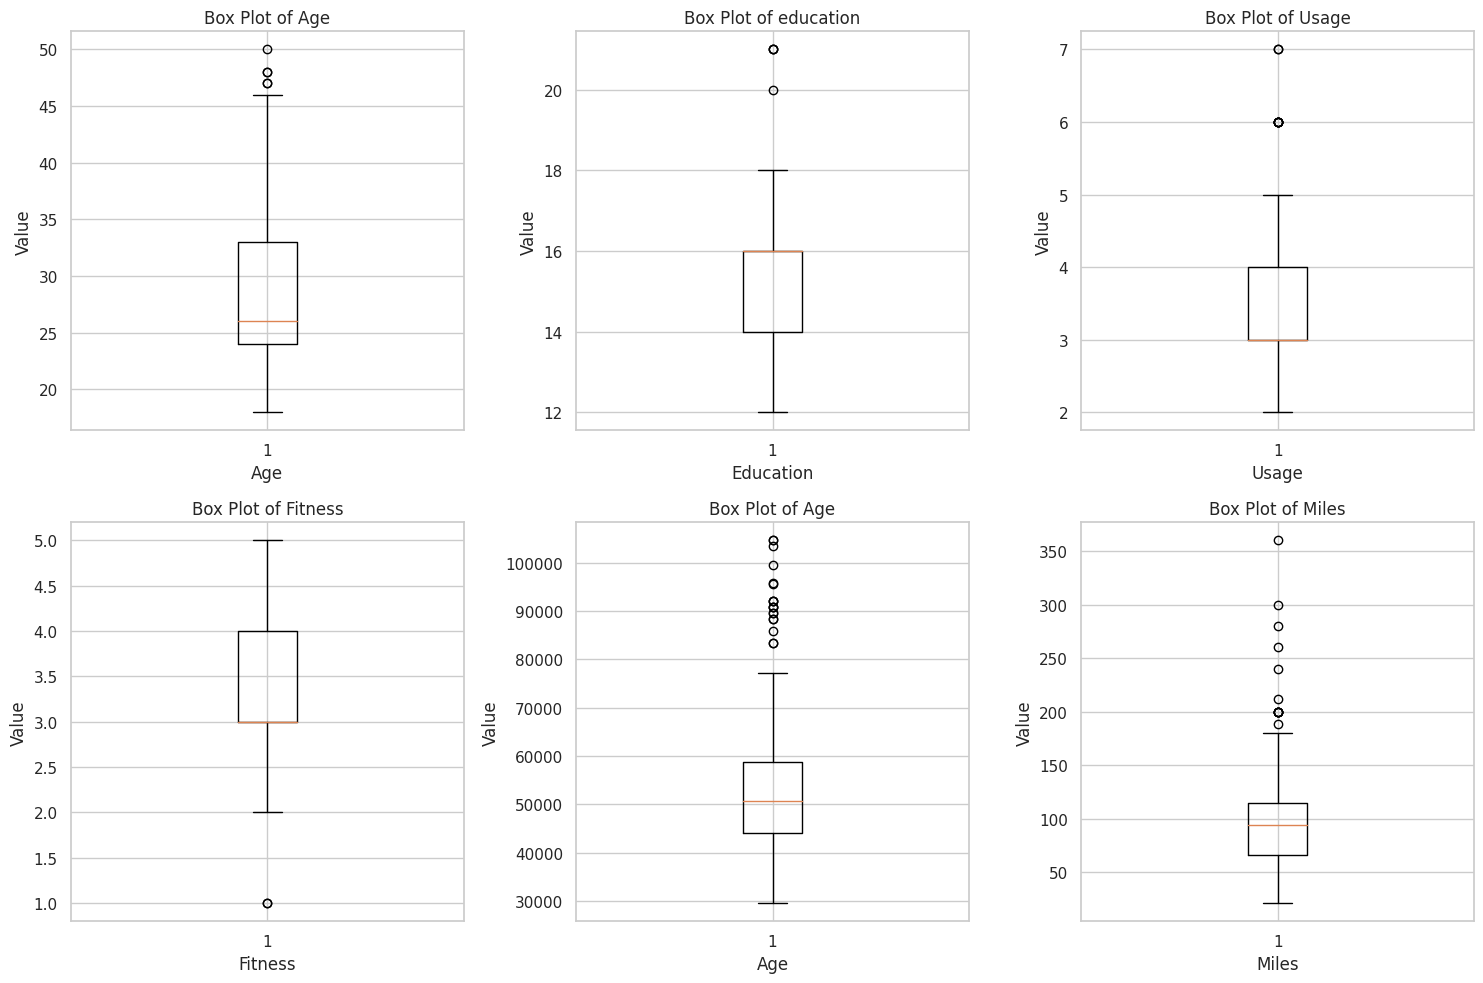

In [ ]:
#Numerical columns are age, education,usage, fitness, income, miles
#Plotting boxplots for all the numeerical columns
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.boxplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Box Plot of Age')

plt.subplot(2,3,2)

plt.boxplot(df['Education'])
plt.xlabel('Education')
plt.ylabel('Value')
plt.title('Box Plot of education')

plt.subplot(2,3,3)

box=plt.boxplot(df['Usage'])
plt.xlabel('Usage')
plt.ylabel('Value')
plt.title('Box Plot of Usage')

plt.subplot(2,3,4)

plt.boxplot(df['Fitness'])
plt.xlabel('Fitness')
plt.ylabel('Value')
plt.title('Box Plot of Fitness')

plt.subplot(2,3,5)

plt.boxplot(df['Income'])
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Box Plot of Age')

plt.subplot(2,3,6)

plt.boxplot(df['Miles'])
plt.xlabel('Miles')
plt.ylabel('Value')
plt.title('Box Plot of Miles')

plt.tight_layout()
plt.show()


### **Insights:**
- **Age:**
  - The median age is around 25.
  - There are several outliers above 45.
- **Education:**
  - The median education level is around 14.
  - There are outliers above 18.
- **Usage:**
  - The median usage is around 3.
  - There are a few outliers above 6.
- **Fitness:**
   - The median fitness level is around 3.5.
   - There are outliers below 1.5.
- **Income:**
   - The median income is around 50,000.
   - There are several outliers above 90,000.
- **Miles:**
   - The median miles is around 100.
   - There are several outliers above 200.

### **Outlier Detection**

In [ ]:
num_cols = ['Age','Education','Usage','Fitness','Income','Miles']
cp4 = ['#A10054','#FC993C','#EE8972','#D15A7C','#FFE775','#BD4682','#8C2057']

for i in range(len(num_cols)):
    data = df[num_cols[i]].tolist()
    mini = np.min(data)
    Q1 = np.percentile(data, 25)
    Q2 = np.median(data)
    Q3 = np.percentile(data, 75)
    maxi = np.max(data)
    IQR = Q3 - Q1

    lo = Q1 - (1.5 * IQR)
    ho = Q3 + (1.5 * IQR)

    lower_outliers=[]
    upper_outliers=[]
    for k in data:
        if k < lo:
            lower_outliers.append(k)

        elif k > ho:
            upper_outliers.append(k)

    uo_pct = round((len(upper_outliers)*100/df.shape[0]),2)
    lo_pct = round((len(lower_outliers)*100/df.shape[0]),2)

    print()
    print(f"Outlier detection of {num_cols[i]}")
    print('.'*30)
    print("Minimum:", mini)
    print("Maximum:", maxi)
    print(f'Initial Range (with outlier) : {(maxi-mini)}')
    print("Q1:", Q1)
    print("Q2:", Q2)
    print("Q3:", Q3)
    print("IQR:", IQR)
    print(f'Final Range (without outlier) : {(ho-lo)}')
    print("Lower outliers are:", lower_outliers)
    print("Upper outliers are:", upper_outliers)
    print(f'Lower Outlier Percentage is {lo_pct}%')
    print(f'Upper Outlier Percentage is {uo_pct}%')
    print(f'Overall Outlier Percentage is {(lo_pct+uo_pct)}%')

    if len(set(lower_outliers)):
        print(f'Outlier points towards left of boxplot : {len(set(lower_outliers))} and they are {(set(lower_outliers))}')
    else:
        print(f'Outlier points towards left of boxplot : {len(set(lower_outliers))}')
    if len(set(upper_outliers)):
        print(f'Outlier points towards right of boxplot : {len(set(upper_outliers))} and they are {(set(upper_outliers))}')
    else:
        print(f'Outlier points towards right of boxplot : {len(set(upper_outliers))}')
    print()



Outlier detection of Age
..............................
Minimum: 18
Maximum: 50
Initial Range (with outlier) : 32
Q1: 24.0
Q2: 26.0
Q3: 33.0
IQR: 9.0
Final Range (without outlier) : 36.0
Lower outliers are: []
Upper outliers are: [47, 50, 48, 47, 48]
Lower Outlier Percentage is 0.0%
Upper Outlier Percentage is 2.78%
Overall Outlier Percentage is 2.78%
Outlier points towards left of boxplot : 0
Outlier points towards right of boxplot : 3 and they are {48, 50, 47}


Outlier detection of Education
..............................
Minimum: 12
Maximum: 21
Initial Range (with outlier) : 9
Q1: 14.0
Q2: 16.0
Q3: 16.0
IQR: 2.0
Final Range (without outlier) : 8.0
Lower outliers are: []
Upper outliers are: [20, 21, 21, 21]
Lower Outlier Percentage is 0.0%
Upper Outlier Percentage is 2.22%
Overall Outlier Percentage is 2.22%
Outlier points towards left of boxplot : 0
Outlier points towards right of boxplot : 2 and they are {20, 21}


Outlier detection of Usage
..............................
Minimum

### **Clipping the data with 5 percentile and 95 percentile**

Age: 5th Percentile = 20.00, 95th Percentile = 43.05
Education: 5th Percentile = 14.00, 95th Percentile = 18.00
Usage: 5th Percentile = 2.00, 95th Percentile = 5.05
Fitness: 5th Percentile = 2.00, 95th Percentile = 5.00
Income: 5th Percentile = 34053.15, 95th Percentile = 90948.25
Miles: 5th Percentile = 47.00, 95th Percentile = 200.00


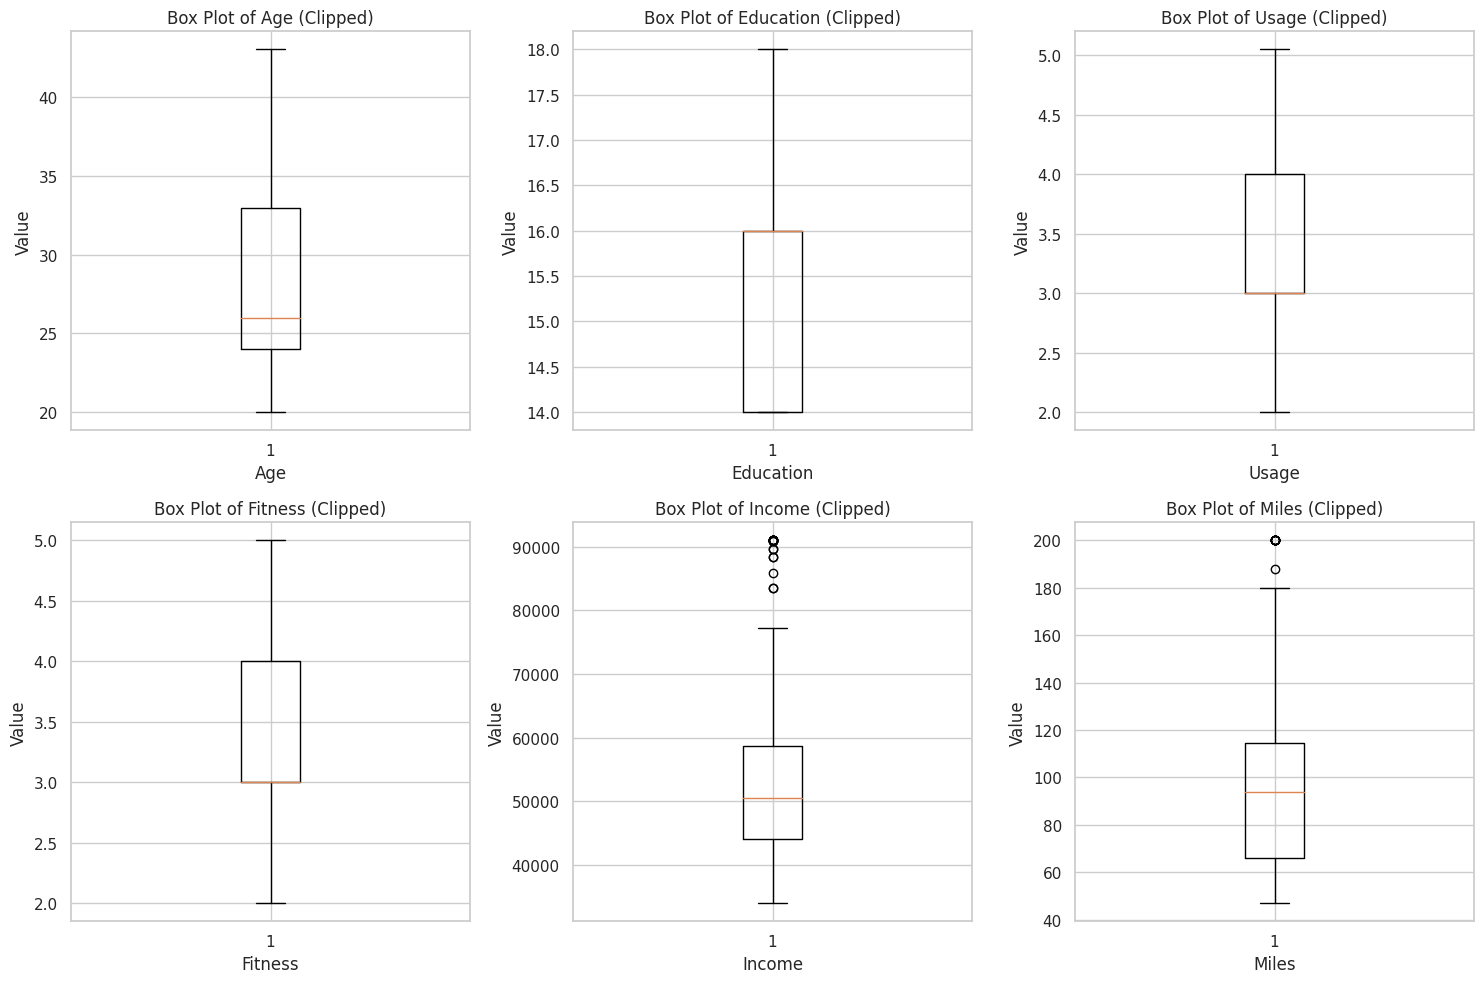

In [ ]:
continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Detecting outliers and clipping data between 5th and 95th percentiles
for var in continuous_vars:
    # Calculate the 5th and 95th percentiles
    lower_bound = np.percentile(df[var], 5)
    upper_bound = np.percentile(df[var], 95)

    # Clip the data
    df[var] = np.clip(df[var], lower_bound, upper_bound)

    # Print the bounds for verification
    print(f'{var}: 5th Percentile = {lower_bound:.2f}, 95th Percentile = {upper_bound:.2f}')

# Plot boxplots again to show the effect of clipping
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[var])
    plt.title(f'Box Plot of {var} (Clipped)')
    plt.xlabel(var)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()




### **Insights:**
- **Age:**
  - The median age remains around 25.
  - Outliers have been removed.
- **Education:**
  - The median education level remains around 14.
  - Outliers have been removed.
- **Usage:**
  - The median usage is around 3.
  - Outliers have been removed.
- **Fitness:**
   - The median fitness level is around 3.5.
   - Outliers have been removed.
- **Income:**
   - The median income is around 50,000.
   - Outliers have been removed.
- **Miles:**
   - The median miles is around 100.
   - Outliers have been removed.

**General Observations:**

**Outliers:**

The initial plots show numerous outliers for each variable, particularly in the upper range for Age, Education, Usage, Income, and Miles, and in the lower range for Fitness.

**Distribution:**

 After clipping, the data distributions are more compact, and the extreme values (outliers) are no longer present.



---



## **Bivariate Analysis:**

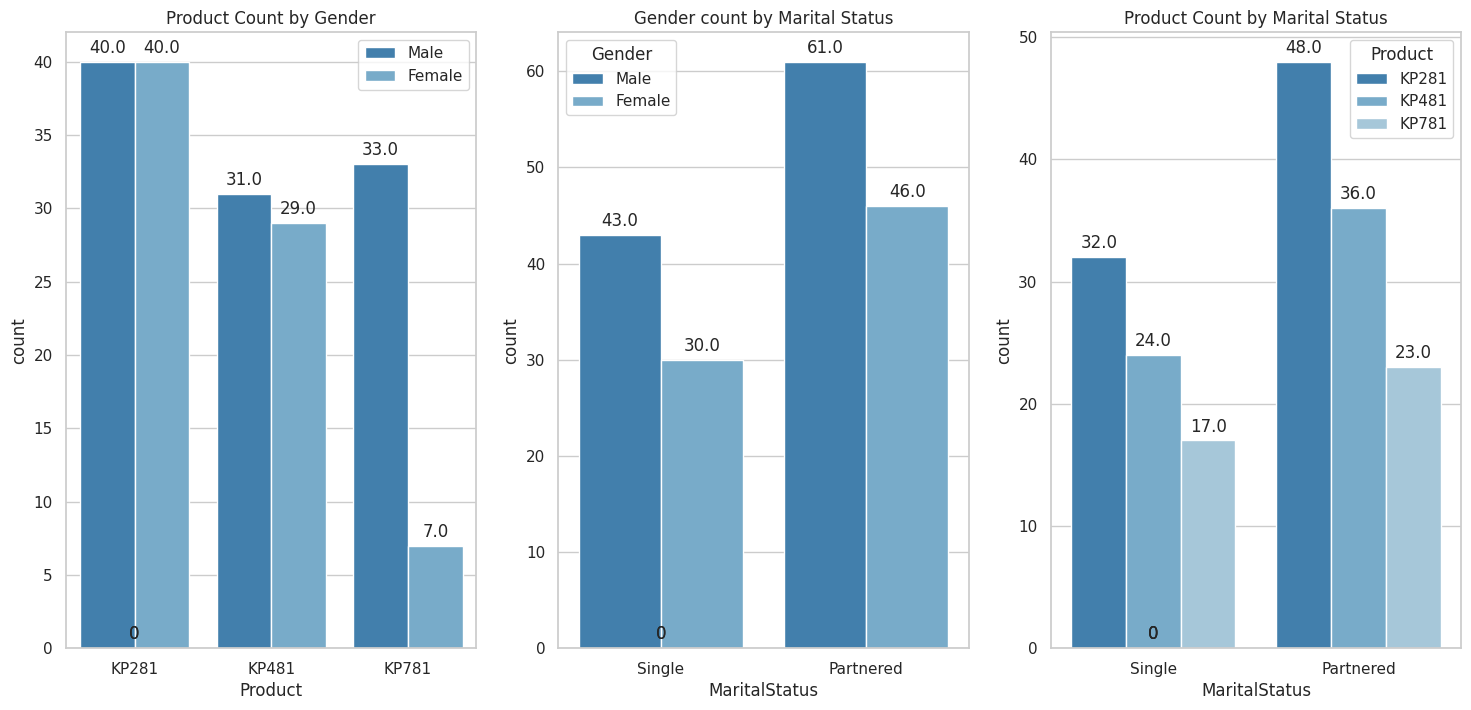

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
ax=sns.countplot(x='Product',data=df,hue='Gender',palette=plt.get_cmap('tab20c').colors)
plt.title('Product Count by Gender')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.subplot(1,3,2)
ax=sns.countplot(x='MaritalStatus',data=df,hue='Gender',palette=plt.get_cmap('tab20c').colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Gender count by Marital Status')


plt.subplot(1,3,3)
ax=sns.countplot(x='MaritalStatus', data=df, hue='Product', palette=plt.get_cmap('tab20c').colors)
plt.title('Product Count by Marital Status')
for p in ax.patches:
  ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


plt.tight_layout()
plt.show()

**Insights:**
- KP281 is the most bought product where 40 male and 40 female bought the product in equal
- KP481 is the second most bought product where 31 male and 29 female bought the threadmill.
- KP781 is the most expensive product where 33 male and 7 female bought the product

- **Marital Status Distribution:**
  - There are more partnered females when compared to single females
  - Similarly applied to male partnered males are higher in count when compared to single males
- **Product Count by Marital Status:**
  - Most people by KP281 either Partnered or Single.
  - Most expensive KP781 waas the least bought product either by Partnered or Single.



---



### **Product Preferences**

### **Checking if any Age, Gender, Marital Status has effect on product purchase**

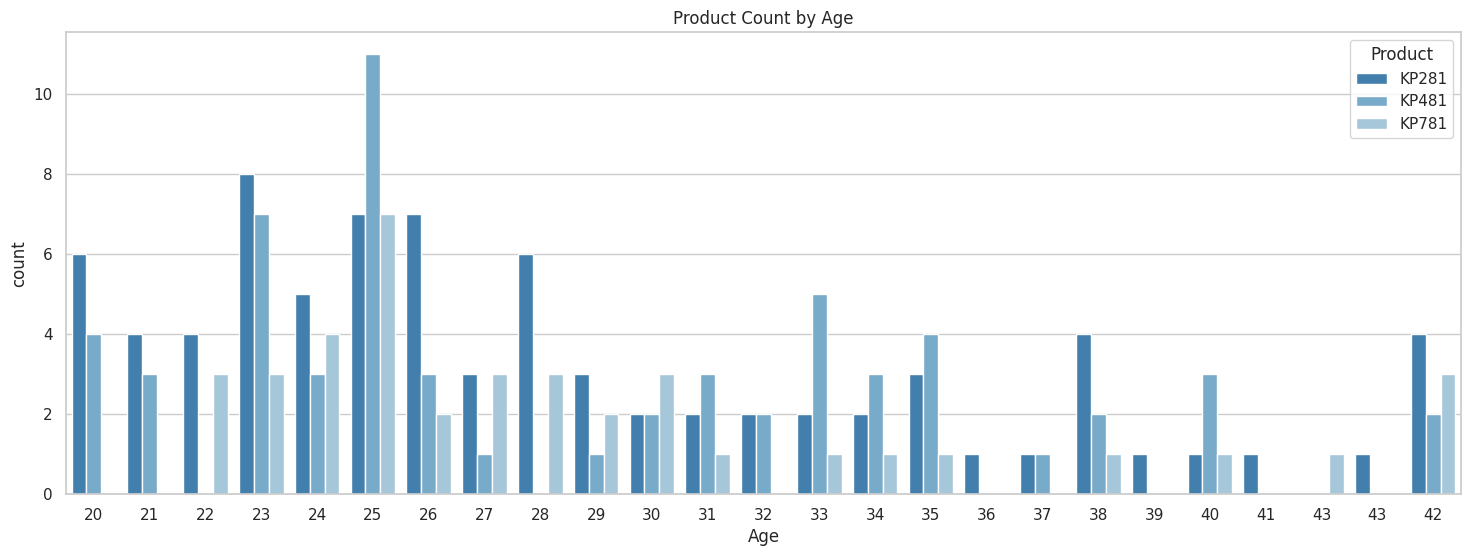

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='Age', data=df, hue='Product', palette=plt.get_cmap('tab20c').colors)
plt.title('Product Count by Age')
plt.xticks(ticks=range(len(df['Age'].unique())), labels=[str(int(age)) for age in df['Age'].unique()])
plt.show()




---


### **Age Column**
Categorizing the values in `age` column in 4 different buckets:
- Young Adult: from 18 - 25
- Adults: from 26 - 35
- Middle Aged : 36-45
### **Education Column**
Categorizing the values in `education`column in 3 different buckets:
- Primary : 0 to 12
- Secondary : 13 to 14
- Higher : 15 and above
### **Income Column**
Categorizing the values in `Income` column in 4 different buckets:
- Low Income - Upto 40,000
- Moderate Income - 40,000 to 60,000
- High Income - 60,000 to 80,000
- Very High Income - Above 80,000
### **Usage Column**  
Categorizing the values in `Usage` column in 4 different buckets:
- Infrequent : 0-2 times
- Regular : 2-3 times
- Frequent: 3-4 times
- Power: more than 4 times
### **Fitness Column**
Categorizing the values in `Fitness` column in 4 different buckets:
- Poor: 0-2
- Below Average: 2-3
- Average: 3-4
- Excellent: more than 4
### **Miles column**
Categorizing the values in `miles` column in 4 different buckets:
- Low  - Upto 50 miles
- Moderate  - 51 to 100 miles
- High  - 101 to 150 miles
- Very High  - Above 151 miles



In [ ]:

#binned for age [18to25,25 to35,35to45]
age_bins=[18,25,35,45]
age_labels=['Young Adults','Adults','Middle Aged']
df['Age_group']=pd.cut(df['Age'],bins=age_bins,labels=age_labels)
#Binning for education [0to12,12to14,14to16,>16]
education_bins=[12,14,16,float('inf')]
education_labels=['Primary','Secondary', 'Higher']
df['Edu_group']=pd.cut(df['Education'],bins=education_bins,labels=education_labels)
#Binning for income [0to40k,40kto60k,60kto80k,>80k]
income_bins=[0,40000,60000,80000,float('inf')]
income_labels=['Low Income','Moderate Income','High Income','Very High Income']
df['Income_group']=pd.cut(df['Income'],bins=income_bins,labels=income_labels)
#binning for usage[0-2,2-3,>4]
usage_bin=[0,2,3,4,float('inf')]
usage_labels=['Infrequent','Regular','Frequent','Power']
df['Usage_group']=pd.cut(df['Usage'],bins=usage_bin,labels=usage_labels)
#Binning for Fitness [0-2,3-4,>4]
fitness_bins=[0,2,3,4,float('inf')]
fitness_labels=['Poor','Below Average','Average','Excellent']
df['Fitness_group']=pd.cut(df['Fitness'],bins=fitness_bins,labels=fitness_labels)
#Binning for miles [0-50,50-100,100-150,>150]
miles_bin = [0, 50, 100, 150, float('inf')]
miles_label = ['Low ','Moderate', 'High', 'Very High']
df['Miles_group']=pd.cut(df['Miles'],bins=miles_bin,labels=miles_label)

df




,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Edu_group,Income_group,Usage_group,Fitness_group,Miles_group
0,KP281,20.00,Male,14,Single,3.00,4,34053.15,112,Young Adults,Primary,Low Income,Regular,Average,High
1,KP281,20.00,Male,15,Single,2.00,3,34053.15,75,Young Adults,Secondary,Low Income,Infrequent,Below Average,Moderate
2,KP281,20.00,Female,14,Partnered,4.00,3,34053.15,66,Young Adults,Primary,Low Income,Frequent,Below Average,Moderate
3,KP281,20.00,Male,14,Single,3.00,3,34053.15,85,Young Adults,Primary,Low Income,Regular,Below Average,Moderate
4,KP281,20.00,Male,14,Partnered,4.00,2,35247.00,47,Young Adults,Primary,Low Income,Frequent,Poor,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40.00,Male,18,Single,5.05,5,83416.00,200,Middle Aged,Higher,Very High Income,Power,Excellent,Very High
176,KP781,42.00,Male,18,Single,5.00,4,89641.00,200,Middle Aged,Higher,Very High Income,Power,Average,Very High
177,KP781,43.05,Male,16,Single,5.00,5,90886.00,160,Middle Aged,Secondary,Very High Income,Power,Excellent,Very High
178,KP781,43.05,Male,18,Partnered,4.00,5,90948.25,120,Middle Aged,Higher,Very High Income,Frequent,Excellent,High


Value_counts based on binning

In [ ]:
for i in ['Age_group','Edu_group','Income_group','Usage_group','Fitness_group','Miles_group']:
  print(df[i].value_counts())

Age_group
Young Adults    79
Adults          73
Middle Aged     28
Name: count, dtype: int64
Edu_group
Secondary    90
Primary      63
Higher       27
Name: count, dtype: int64
Income_group
Moderate Income     106
Low Income           32
High Income          23
Very High Income     19
Name: count, dtype: int64
Usage_group
Regular       69
Frequent      52
Infrequent    33
Power         26
Name: count, dtype: int64
Fitness_group
Below Average    97
Excellent        31
Poor             28
Average          24
Name: count, dtype: int64
Miles_group
Moderate     97
High         38
Very High    28
Low          17
Name: count, dtype: int64


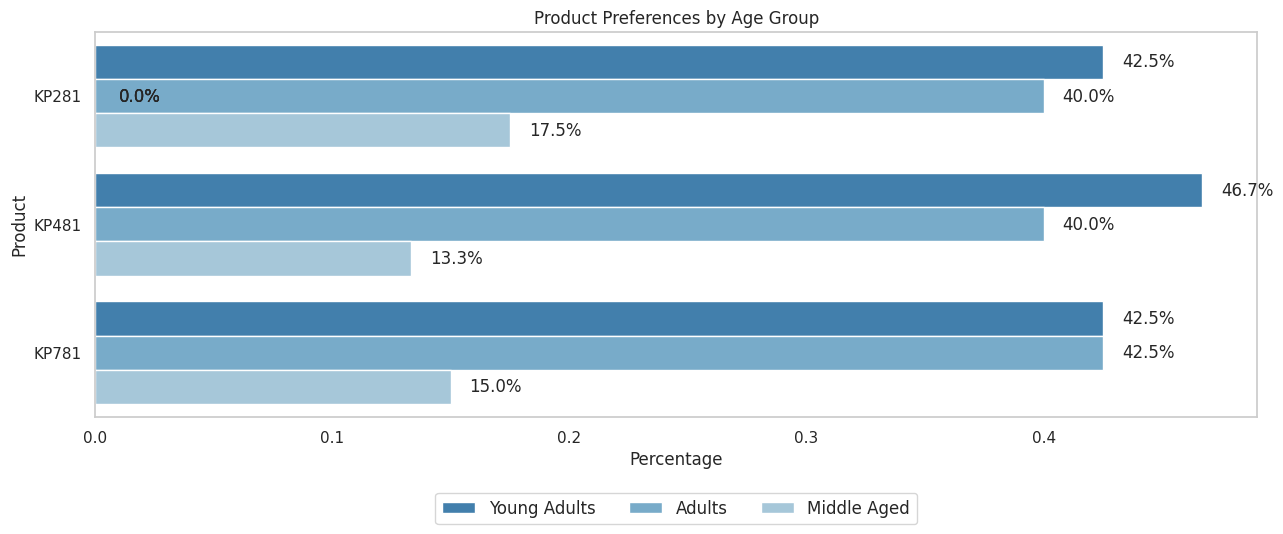

In [ ]:

df_grp = df.groupby('Product')['Age_group'].value_counts(normalize=True).unstack().reset_index()
df_grp.set_index('Product', inplace=True)
melted_data = df_grp.reset_index().melt(id_vars=['Product'], var_name='Age_group', value_name='Percentage')

# Plot using Seaborn
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=melted_data, x='Percentage', y='Product', hue='Age_group', palette='tab20c')

# Set labels and title
plt.title('Product Preferences by Age Group')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, fontsize=12)
plt.grid(False)

# Annotate labels on each bar segment
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.019, p.get_y() + p.get_height() / 2, f'{width:.1%}', ha='center', va='center')

plt.show()


**Insights:**
- KP281:

 - Highest preference among Young Adults(42.5%).
 - Low to Moderate preference among Middle Aged (17.5%).
 - Moderate preference among  Adults(40%).
- KP481:

  - Preferred most by Young Adults (46.7%).
  - Moderate preference among Adults (40.0%).
  - Lesser preference among Middle Aged (13.3%).
- KP781:

 Equal preference across all age groups (42.5%).

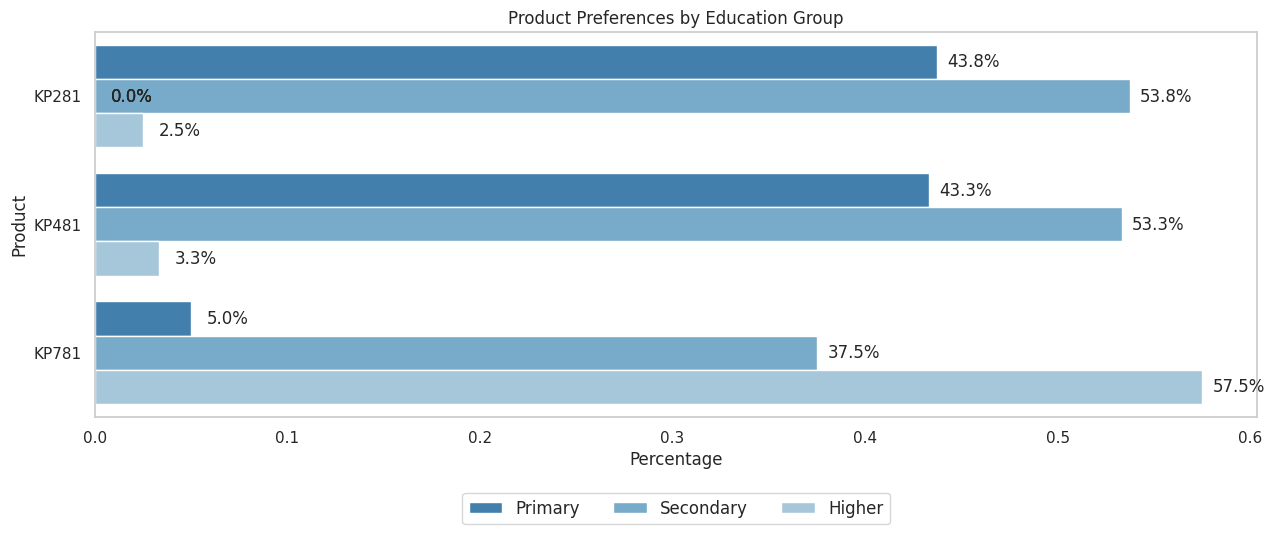

In [ ]:
df_grp = df.groupby('Product')['Edu_group'].value_counts(normalize=True).unstack().reset_index()
df_grp.set_index('Product', inplace=True)
melted_data = df_grp.reset_index().melt(id_vars=['Product'], var_name='Edu_group', value_name='Percentage')

# Plot using Seaborn
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=melted_data, x='Percentage', y='Product', hue='Edu_group', palette='tab20c')

# Set labels and title
plt.title('Product Preferences by Education Group')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, fontsize=12)
plt.grid(False)

# Annotate labels on each bar segment
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.019, p.get_y() + p.get_height() / 2, f'{width:.1%}', ha='center', va='center')

plt.show()

**Insights:**
- KP281:

  - Moderate preference among Primary educated individuals(43.8%).
  - Low preference among Higher educated individuals (2.5%).
  - Highest preference among Secondary educated individuals (53.8%).
- KP481:

  - Primary educated individuals show moderate preference (43.3%).
  - Very low preference among Higher educated individuals (3.3%).
  - Secondary educated individuals also show significant preference (53.3%).
- KP781:

  - Low preference among Primary educated individuals (5.0%).
  - Moderate preference among Secondary educated individuals (37.5%).
  - Highest preference among Higher educated individuals (57.5%).

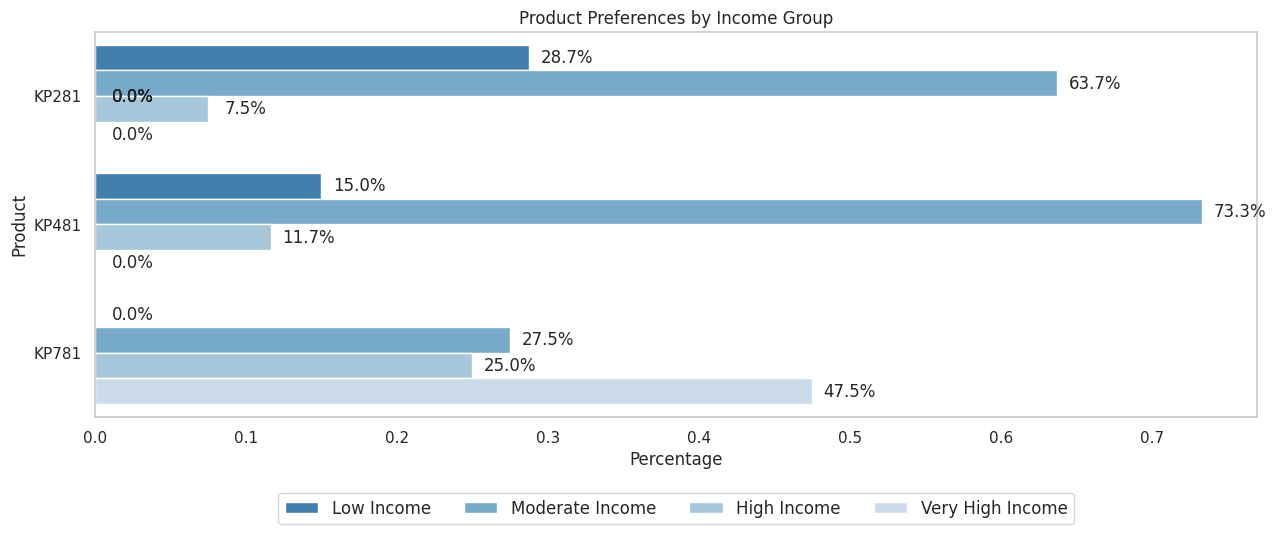

In [ ]:
df_grp = df.groupby('Product')['Income_group'].value_counts(normalize=True).unstack().reset_index()
df_grp.set_index('Product', inplace=True)
melted_data = df_grp.reset_index().melt(id_vars=['Product'], var_name='Income_group', value_name='Percentage')

# Plot using Seaborn
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=melted_data, x='Percentage', y='Product', hue='Income_group', palette='tab20c')

# Set labels and title
plt.title('Product Preferences by Income Group')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, fontsize=12)
plt.grid(False)

# Annotate labels on each bar segment
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.025, p.get_y() + p.get_height() / 2, f'{width:.1%}', ha='center', va='center')

plt.show()

**Insights:**
- Threadmill model KP781 is preferred more by customers with Very High Income

- Both threadmill models, KP481 and KP281, are preferred more by customers with Moderate Income

1. **KP281**:
   - No preference among Very High Income individuals.
   - Low preference among High Income individuals (7.5%).
   - Moderate preference among Low Income individuals (28.7%).
   - Highest preference among Moderate Income individuals (63.7%).

2. **KP481**:
   - No preference among Very High Income individuals.
   - Moderate preference among Low Income individuals (15.0%).
   - Low preference among High Income individuals (11.7%).
   - Highest preference among Moderate Income individuals (73.3%).

3. **KP781**:
   - No preference among Low Income individuals.
   - Moderate preference among Moderate Income individuals (27.5%).
   - Moderate preference among High Income individuals (25.0%).
   - Highest preference among Very High Income individuals (47.5%).

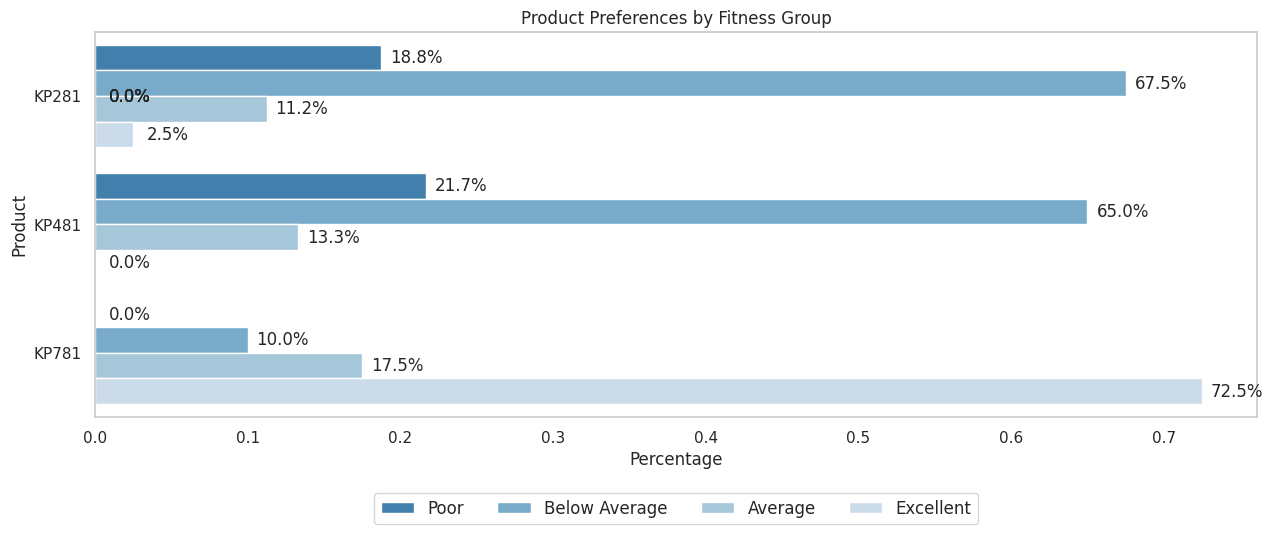

In [ ]:
df_grp = df.groupby('Product')['Fitness_group'].value_counts(normalize=True).unstack().reset_index()
df_grp.set_index('Product', inplace=True)
melted_data = df_grp.reset_index().melt(id_vars=['Product'], var_name='Fitness_group', value_name='Percentage')

# Plot using Seaborn
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=melted_data, x='Percentage', y='Product', hue='Fitness_group', palette='tab20c')

# Set labels and title
plt.title('Product Preferences by Fitness Group')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, fontsize=12)
plt.grid(False)

# Annotate labels on each bar segment
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.023, p.get_y() + p.get_height() / 2, f'{width:.1%}', ha='center', va='center')

plt.show()

**Insights:**
1. **KP281**:
   - This product has the highest preference in the "Below Average Shaped" category with 67.5% of respondents.
   - Average Shaped has preference of 11.2% .
   - Poor Shaped has preference of 18.8% .
   -  Excellent Shaped has preference of buying 2.5% .

2. **KP481**:
   -  Below Average Shaped has preference of buying KP481 is 65.0%.
   -  Poor Shaped has preference of buying KP481 is 21.7%.
   -  Average Shaped has preference of buying KP481 is 13.3%.
   -  No preference by Excellent Shaped.

3. **KP781**:
   - This product has the highest percentage in the "Excellent Shaped" category with 72.5% of preference.
   - Average Shaped has preference of buying KP781 is 17.5%.
   - Below Average Shaped has preference of buying KP781 is 10.0%.
   - No preference by Poor Shaped.


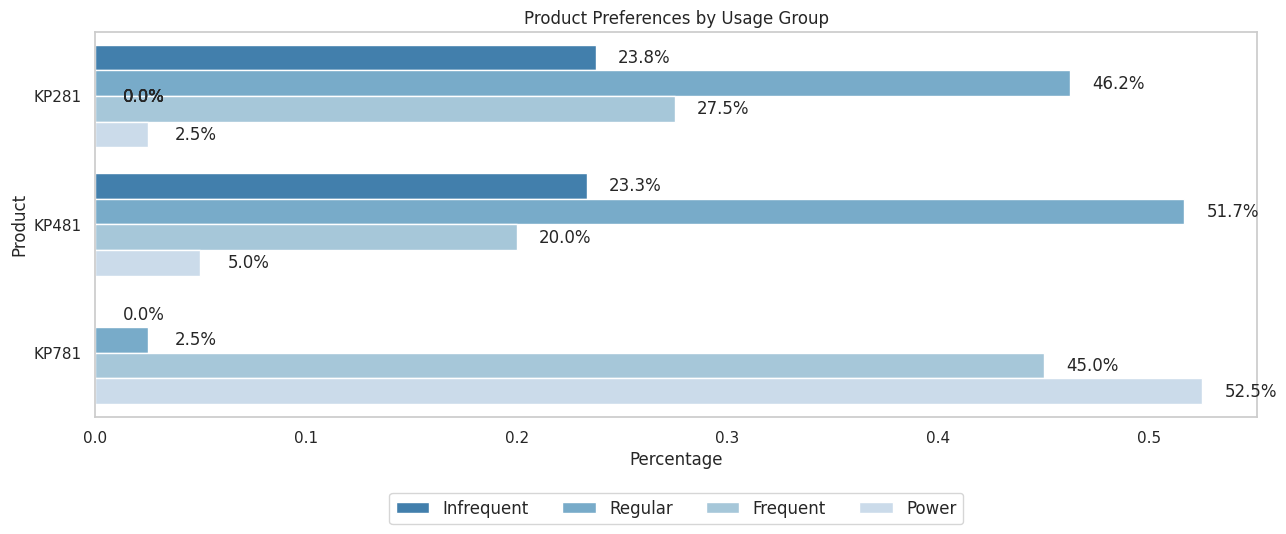

In [ ]:
df_grp = df.groupby('Product')['Usage_group'].value_counts(normalize=True).unstack().reset_index()
df_grp.set_index('Product', inplace=True)
melted_data = df_grp.reset_index().melt(id_vars=['Product'], var_name='Usage_group', value_name='Percentage')

# Plot using Seaborn
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=melted_data, x='Percentage', y='Product', hue='Usage_group', palette='tab20c')

# Set labels and title
plt.title('Product Preferences by Usage Group')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, fontsize=12)
plt.grid(False)

# Annotate labels on each bar segment
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.023, p.get_y() + p.get_height() / 2, f'{width:.1%}', ha='center', va='center')

plt.show()

**Insights:**
- Most power users use KP781 with preference of 52.5%
- Regular users use KP481,KP281 with preference of 51.7%,46.2%
respectively
- No Infrequent users use KP781




1. **KP281**
   - Infrequent users: 23.8%
   - Regular users: 46.2%
   - Frequent users: 27.5%
   - Power users: 2.5%

2. **KP481**
   - Infrequent users: 23.3%
   - Regular users: 51.7%
   - Frequent users: 20%
   - Power users: 5%

3. **KP781**
   - Infrequent users: 0%
   - Regular users: 2.5%
   - Frequent users: 45%
   - Power users: 52.5%




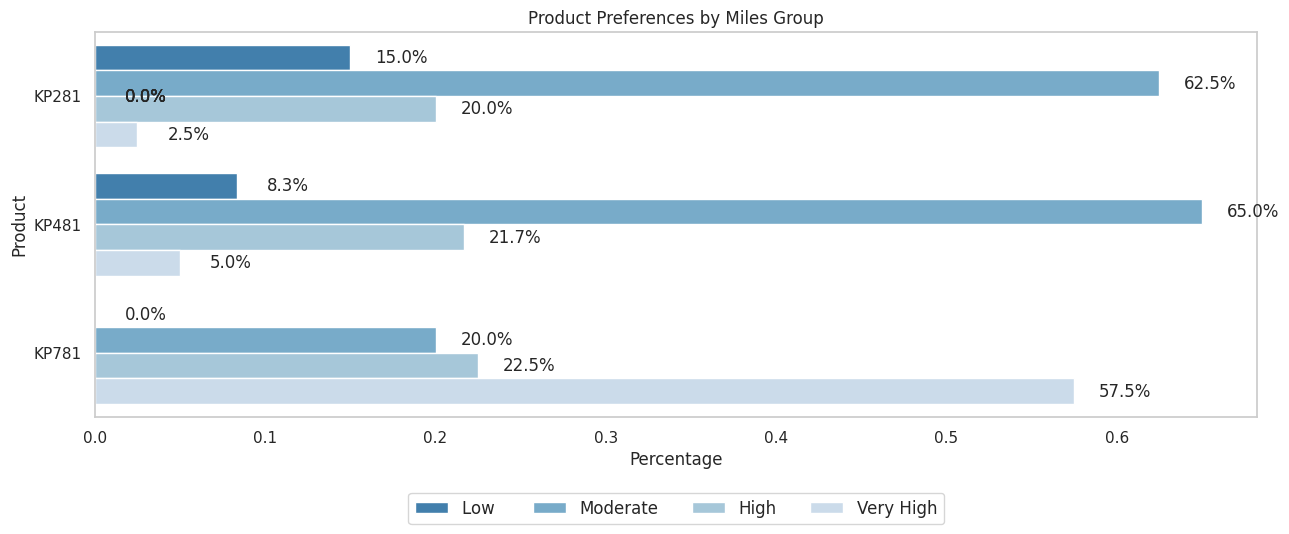

In [ ]:
df_grp = df.groupby('Product')['Miles_group'].value_counts(normalize=True).unstack().reset_index()
df_grp.set_index('Product', inplace=True)
melted_data = df_grp.reset_index().melt(id_vars=['Product'], var_name='Miles_group', value_name='Percentage')

# Plot using Seaborn
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=melted_data, x='Percentage', y='Product', hue='Miles_group', palette='tab20c')

# Set labels and title
plt.title('Product Preferences by Miles Group')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, fontsize=12)
plt.grid(False)

# Annotate labels on each bar segment
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.03, p.get_y() + p.get_height() / 2, f'{width:.1%}', ha='center', va='center')

plt.show()

**Insights:**
- Mostly moderate running persons use KP481 threadmill.
- Very high running persons use KP781
- Low running persons do not buy KP781 as it is the expensive product.
- Threadmill model KP781 is preferred more by customers planning to run 100 to 200 miles per week

- Both threadmill models, KP481 and KP281, are preferred more by customers planning to run 50 to 100 miles per week


1. **KP281**
   - Low miles group: 15.0%
   - Moderate miles group: 62.5%
   - High miles group: 20.0%
   - Very High miles group: 2.5%

2. **KP481**
   - Low miles group: 8.3%
   - Moderate miles group: 65.0%
   - High miles group: 21.7%
   - Very High miles group: 5.0%

3. **KP781**
   - Low miles group: 0.0%
   - Moderate miles group: 20.0%
   - High miles group: 22.5%
   - Very High miles group: 57.5%


## **Correlation Between Continuous Variables**

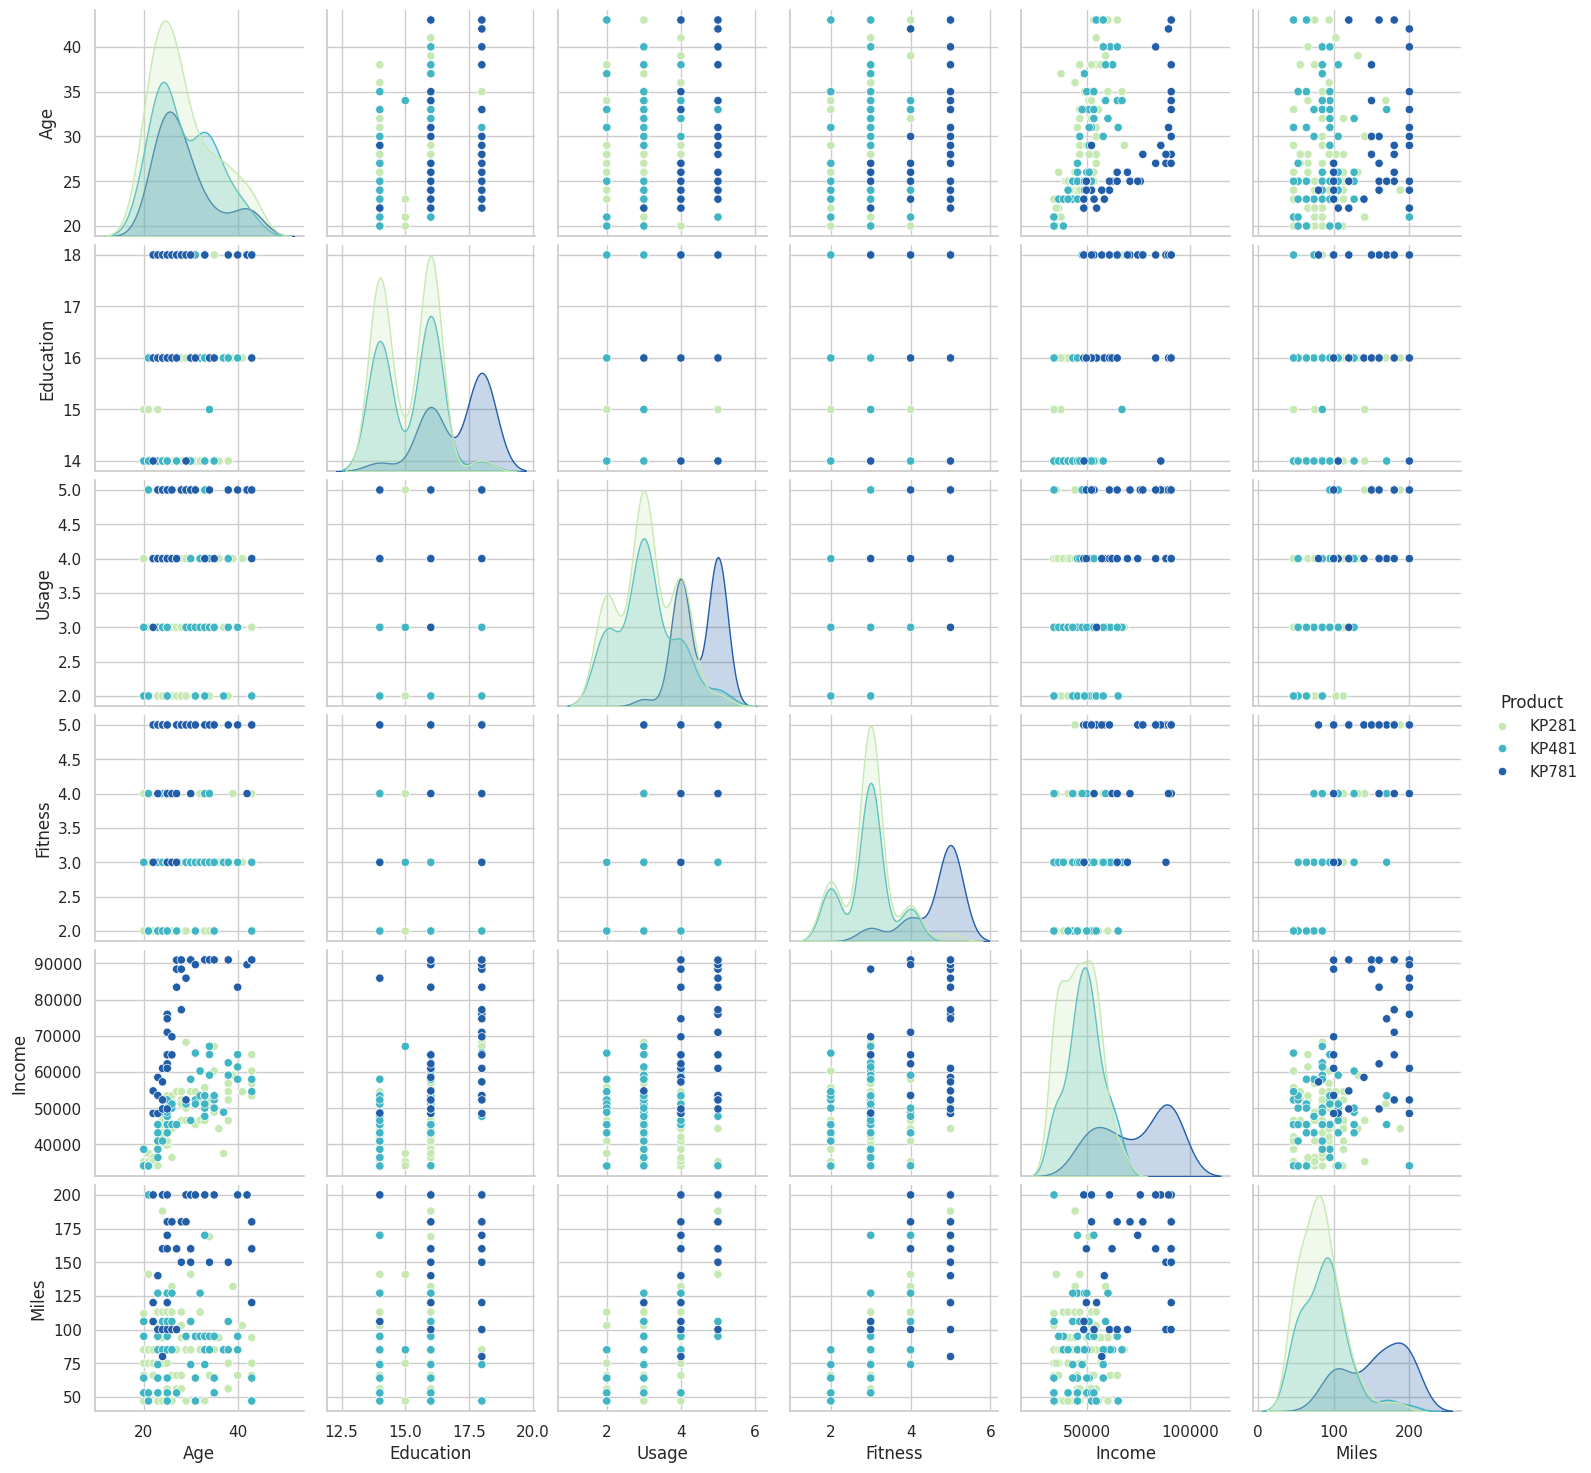

In [79]:
#Correlation between continuous variables pairplot

#converting age, usage, fitness to int64
df['Age']=df['Age'].astype('int64')
df['Usage']=df['Usage'].astype('int64')
df['Fitness']=df['Fitness'].astype('int64')
sns.pairplot(df, hue ='Product', palette= 'YlGnBu')
plt.show()


## **Insights for Scatterplot Matrix by Product**

- **KP281**: Attracts younger users with lower education, fitness, income, and miles traveled.
- **KP481**: Appeals to a more diverse age group with higher fitness and income levels, and moderate travel distances.
- **KP781**: Preferred by older users with higher income and fitness levels, and longer travel distances.
- From above plots we can clearly distinguish the user of KP781 based on Fitness, Miles, Income and Usage
- The users of KP281 and KP481 are similar in pattern. This will require a deeper analysis to differentiate between the two.

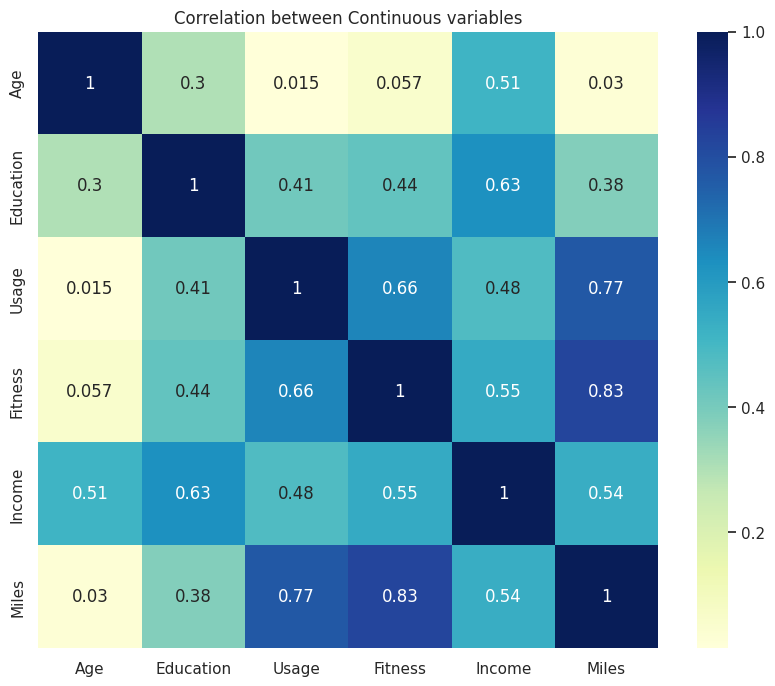

In [ ]:
plt.figure(figsize=(10,8))
corr_mat=df[continuous_vars].corr()
sns.heatmap(corr_mat,annot=True,cmap='YlGnBu')
plt.title('Correlation between Continuous variables')
plt.show()

**Insights:**
- **Strong Positive Correlations:**
   - Fitness and Miles: High correlation (0.83), indicating that higher fitness levels are associated with more miles.
   - Usage and Miles: One of the high correlation (0.77), suggesting that increased usage is linked to more miles.
- **Moderate Positive Correlations:**
  - Education and Income: Correlation of (0.63), showing that higher education levels are associated with higher income.
  - Usage and Fitness: Correlation of (0.66), indicating that higher usage is related to better fitness.
  - Age and Income: Correlation of (0.51), suggesting a weak positive relationship between age and income.
- **Low to Moderate Correlations:**
  - Age and Education: Correlation of (0.3), indicating a weak positive relationship between age and education.
Weak or No Correlations:
Most other variable pairs show weak or no significant correlation, indicating little to no linear relationship between them.




---



# **Probability:**
### **Find the marginal probability (what percent of customers have purchased KP281, KP481, or KP781)**

In [ ]:

length_of_df=len(df)
prob_KP281=round(len(df[df['Product']=='KP281'])/length_of_df,2)
prob_KP481=round(len(df[df['Product']=='KP481'])/length_of_df,2)
prob_KP781=round(len(df[df['Product']=='KP781'])/length_of_df,2)
print('Probability of KP281:',prob_KP281)
print('Probability of KP481:',prob_KP481)
print('Probability of KP781:',prob_KP781)

Probability of KP281: 0.44
Probability of KP481: 0.33
Probability of KP781: 0.22


***Marginal Probability of Each Product:***

--> **44.44%** of customers bought **KP281**

--> **33.33%** of customers bought **KP481**

--> **22.22%** of customers bought **KP781**

In [ ]:
#Conditional Probability of Product with respect to Age
cond_prob_age=np.round(pd.crosstab(df['Age_group'],df['Product'],normalize=True,margins=True),2)
cond_prob_age

Product,KP281,KP481,KP781,All
Age_group,,,,
Young Adults,0.19,0.16,0.09,0.44
Adults,0.18,0.13,0.09,0.41
Middle Aged,0.08,0.04,0.03,0.16
All,0.44,0.33,0.22,1.00


***Marginal Probability of each Age_Group buying Threadmill:***
1. The Probability of a treadmill being purchased by a **Young Adult(18-25)** is `44%`
2. The Probability of a treadmill being purchased by a **Adults(26-35)** is `41%`
3. The Probability of a treadmill being purchased by a **Middle Aged(36-45)** is `16%`

**Conditional Probability:**
1. The conditional probability of purchasing the treadmill model given that the customer is Young Adult is

   - For Treadmill model KP281 - `19%`

   -  For Treadmill model KP481 - `16%`

   - For Treadmill model KP781 - `9%`
2. The conditional probability of purchasing the treadmill model given that the customer is Adult is -

   - For Treadmill model KP281 - `18%`

   - For Treadmill model KP481 - `13%`

   - For Treadmill model KP781 - `9%`
3. The conditional probability of purchasing the treadmill model given that the customer is Middle Aged is -

   - For Treadmill model KP281 - `8%`

   - For Treadmill model KP481 - `4%`

   - For Treadmill model KP781 - `3%`


In [ ]:
#Gender
cond_prob_gender=np.round(pd.crosstab(df['Gender'],df['Product'],normalize=True,margins=True),2)
cond_prob_gender

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.22,0.16,0.04,0.42
Male,0.22,0.17,0.18,0.58
All,0.44,0.33,0.22,1.00


***Marginal Probability of each Gender buying Threadmill:***
1. The Probability of threadmill being purchased by **Female** is `42%`
2. The Probability of threadmill being purchased by **Male** is `58%`

**Conditional Probability:**
1. The conditional probability of purchasing the treadmill model given that the customer is `Female` is -

    - For Treadmill model KP281 - `22%`

    - For Treadmill model KP481 - `16%`

    - For Treadmill model KP781 - `4%`
2. The conditional probability of purchasing the treadmill model given that the customer is `Male` is -

    - For Treadmill model KP281 - `22%`

    - For Treadmill model KP481 - `17%`

    - For Treadmill model KP781 - `18%`




In [ ]:
#Edu_grp
cond_prob_edu=np.round(pd.crosstab(df['Edu_group'],df['Product'],normalize=True,margins=True),2)
cond_prob_edu

Product,KP281,KP481,KP781,All
Edu_group,,,,
Primary,0.19,0.14,0.01,0.35
Secondary,0.24,0.18,0.08,0.50
Higher,0.01,0.01,0.13,0.15
All,0.44,0.33,0.22,1.00


***Marginal Probability of each Educated Person buying Threadmill:***
1. The Probability of threadmill being purchased by **Primary Educated Person(0-12)** is `35%`
2. The Probability of threadmill being purchased by **Secondary Educated Person(13-14)** is `50%`
3. The Probability of threadmill being purchased by **Higher Educated Person(above 14)** is `15%`

**Conditional Probability:**
1. The conditional probability of purchasing the treadmill model given that the customer is `Primary Educated Person` is -

    - For Treadmill model KP281 - `19%`

    - For Treadmill model KP481 - `14%`

    - For Treadmill model KP781 - `1%`
2. The conditional probability of purchasing the treadmill model given that the customer is `Secondary Educated Person` is -

    - For Treadmill model KP281 - `24%`

    - For Treadmill model KP481 - `18%`

    - For Treadmill model KP781 - `8%`
3. The conditional probability of purchasing the treadmill model given that the customer is `Higher Educated Person` is -

    - For Treadmill model KP281 - `1%`

    - For Treadmill model KP481 - `1%`

    - For Treadmill model KP781 - `13%`


In [ ]:
#Marital_status
cond_prob_marital=np.round(pd.crosstab(df['MaritalStatus'],df['Product'],normalize=True,margins=True),2)
cond_prob_marital

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.27,0.20,0.13,0.59
Single,0.18,0.13,0.09,0.41
All,0.44,0.33,0.22,1.00


***Marginal Probability of Partnered and Single buying Threadmill:***
1. The Probability of threadmill being purchased by **Partnered** is `59%`
2. The Probability of threadmill being purchased by **Single** is `41%`

**Conditional Probability:**

1. The conditional probability of purchasing the treadmill model given that the customer is `Partnered Person` is -

    - For Treadmill model KP281 - `24%`

    - For Treadmill model KP481 - `18%`

    - For Treadmill model KP781 - `8%`
2. The conditional probability of purchasing the treadmill model given that the customer is `Single Person` is -

    - For Treadmill model KP281 - `24%`

    - For Treadmill model KP481 - `18%`

    - For Treadmill model KP781 - `8%`


In [ ]:
#usage_grp
cond_prob_usage=np.round(pd.crosstab(df['Usage_group'],df['Product'],normalize=True,margins=True),2)
cond_prob_usage

Product,KP281,KP481,KP781,All
Usage_group,,,,
Infrequent,0.11,0.08,0.00,0.18
Regular,0.21,0.17,0.01,0.38
Frequent,0.12,0.07,0.10,0.29
Power,0.01,0.02,0.12,0.14
All,0.44,0.33,0.22,1.00


***Marginal Probability of Users Usage buying Threadmill:***
1. The Probability of threadmill being purchased by **Infrequent User(0-2)** is `18%`
2. The Probability of threadmill being purchased by **Regular User(2-3)** is `38%`
3. The Probability of threadmill being purchased by **Frequent User(3-4)** is `29%`
4. The Probability of threadmill being purchased by **Power User(above 4)** is `14%`

**Condtional Probability:**
1. The conditional probability of purchasing the treadmill model given that the customer is `Infrequent User` is -

    - For Treadmill model KP281 - `11%`

    - For Treadmill model KP481 - `8%`

    - For Treadmill model KP781 - `0%`
2. The conditional probability of purchasing the treadmill model given that the customer is `Regular User` is -

    - For Treadmill model KP281 - `21%`

    - For Treadmill model KP481 - `17%`

    - For Treadmill model KP781 - `1%`
3. The conditional probability of purchasing the treadmill model given that the customer is `Frequent User` is -

    - For Treadmill model KP281 - `12%`

    - For Treadmill model KP481 - `7%`

    - For Treadmill model KP781 - `10%`
4. The conditional probability of purchasing the treadmill model given that the customer is `Power User` is -

    - For Treadmill model KP281 - `1%`

    - For Treadmill model KP481 - `2%`

    - For Treadmill model KP781 - `12%`

In [ ]:
#fitness_grp
cond_prob_fitness=np.round(pd.crosstab(df['Fitness_group'],df['Product'],normalize=True,margins=True),2)
cond_prob_fitness

Product,KP281,KP481,KP781,All
Fitness_group,,,,
Poor,0.08,0.07,0.00,0.16
Below Average,0.30,0.22,0.02,0.54
Average,0.05,0.04,0.04,0.13
Excellent,0.01,0.00,0.16,0.17
All,0.44,0.33,0.22,1.00


***Marginal Probability of each Fitness Shape buying Threadmill:***
1. The Probability of threadmill being purchased by **Poor Shape User(0-2)** is `42%`
2. The Probability of threadmill being purchased by **Below Average Shape User(2-3)** is `54%`
3. The Probability of threadmill being purchased by **Below Average Shape User(3-4)** is `13%`
4. The Probability of threadmill being purchased by **Below Average Shape User(above 4)** is `17%`

**Conditional Probability:**
1. The conditional probability of purchasing the treadmill model given that the customer is `Poor Shaped Person` is -

    - For Treadmill model KP281 - `8%`

    - For Treadmill model KP481 - `7%`

    - For Treadmill model KP781 - `0%`
2. The conditional probability of purchasing the treadmill model given that the customer is `Below Average Shaped Person` is -

    - For Treadmill model KP281 - `30%`

    - For Treadmill model KP481 - `22%`

    - For Treadmill model KP781 - `2%`
3. The conditional probability of purchasing the treadmill model given that the customer is `Average Shaped Person` is -

    - For Treadmill model KP281 - `5%`

    - For Treadmill model KP481 - `4%`

    - For Treadmill model KP781 - `4%`
4. The conditional probability of purchasing the treadmill model given that the customer is `Excellent Shaped Person` is -

    - For Treadmill model KP281 - `1%`

    - For Treadmill model KP481 - `0%`

    - For Treadmill model KP781 - `16%`

In [ ]:
#income_grp
cond_prob_income=np.round(pd.crosstab(df['Income_group'],df['Product'],normalize=True,margins=True),2)
cond_prob_income

Product,KP281,KP481,KP781,All
Income_group,,,,
Low Income,0.13,0.05,0.00,0.18
Moderate Income,0.28,0.24,0.06,0.59
High Income,0.03,0.04,0.06,0.13
Very High Income,0.00,0.00,0.11,0.11
All,0.44,0.33,0.22,1.00


***Marginal Probability of each Income Group buying Threadmill:***
1. The Probability of threadmill being purchased by **Low Income(0-40k)** is `18%`
2. The Probability of threadmill being purchased by **Moderate Income(40k-60k)** is `59%`
3. The Probability of threadmill being purchased by **Moderate Income(60k-80k)** is `13%`
4. The Probability of threadmill being purchased by **Moderate Income(above 80k)** is `11%`
**Conditional Probability:**
1. The conditional probability of purchasing the treadmill model given that the customer is `Low Income Person` is -

    - For Treadmill model KP281 - `13%`

    - For Treadmill model KP481 - `5%`

    - For Treadmill model KP781 - `0%`
2. The conditional probability of purchasing the treadmill model given that the customer is `Moderate Income Person` is -

    - For Treadmill model KP281 - `28%`

    - For Treadmill model KP481 - `24%`

    - For Treadmill model KP781 - `6%`
3. The conditional probability of purchasing the treadmill model given that the customer is `High Income Person` is -

    - For Treadmill model KP281 - `3%`

    - For Treadmill model KP481 - `4%`

    - For Treadmill model KP781 - `6%`
4. The conditional probability of purchasing the treadmill model given that the customer is `Very High Income Person` is -

    - For Treadmill model KP281 - `0%`

    - For Treadmill model KP481 - `0%`

    - For Treadmill model KP781 - `11%`

In [ ]:
#miles_grp
cond_prob_miles=np.round(pd.crosstab(df['Miles_group'],df['Product'],normalize=True,margins=True),2)
cond_prob_miles

Product,KP281,KP481,KP781,All
Miles_group,,,,
Low,0.07,0.03,0.00,0.09
Moderate,0.28,0.22,0.04,0.54
High,0.09,0.07,0.05,0.21
Very High,0.01,0.02,0.13,0.16
All,0.44,0.33,0.22,1.00


***Marginal Probability of User running per week buying Threadmill:***
1. The Probability of threadmill being purchased by **Low running user(less than 50 miles)** is `9%`
2. The Probability of threadmill being purchased by **Moderate running user(51-100 miles)** is `54%`
3. The Probability of threadmill being purchased by **High running user(101-150 miles)** is `21%`
4. The Probability of threadmill being purchased by **Very High running user(above 150 miles)** is `16%`

**Conditional Probability:**
1. The conditional probability of purchasing the treadmill model given that the customer is `runs low` is -

    - For Treadmill model KP281 - `7%`

    - For Treadmill model KP481 - `3%`

    - For Treadmill model KP781 - `0%`
2. The conditional probability of purchasing the treadmill model given that the customer is `runs moderate` is -

    - For Treadmill model KP281 - `28%`

    - For Treadmill model KP481 - `22%`

    - For Treadmill model KP781 - `4%`
3. The conditional probability of purchasing the treadmill model given that the customer is `runs high` is -

    - For Treadmill model KP281 - `9%`

    - For Treadmill model KP481 - `7%`

    - For Treadmill model KP781 - `5%`
4. The conditional probability of purchasing the treadmill model given that the customer is `runs very high` is -

    - For Treadmill model KP281 - `1%`

    - For Treadmill model KP481 - `2%`

    - For Treadmill model KP781 - `13%`



---



# **Customer Profiling**

# **Customer Profile for KP281 Treadmill:**
### **Age:**

- Mainly between 18 to 35 years.
- Few customers between 35 to 50 years.

### **Gender:**

- Equal distribution of male and female customers.

### **Marital Status:**

- Both partnered and single individuals purchase this model.

### **Education Level:**

Mostly secondary educated (13-14 years of education).
Higher educated individuals also purchase this model.
### **Income:**

- Annual income below USD 60,000.
- Moderate income users (USD 40,000 to USD 60,000).

### **Usage:**

- Weekly usage: 2 to 4 times.
- Preferred by regular users (2-3 times per week).

### **Fitness Scale:**

- Fitness level: 2 to 4 (Below Average to Average).

### **Weekly Running Mileage:**

- Primarily 50 to 100 miles per week.
- Customer Profile for KP481 Treadmill:



# **Customer Profile for KP481 Treadmill:**
### **Age:**

- Mainly between 18 to 35 years.
- Few customers between 35 to 50 years.

### **Gender:**

- Slightly more male customers compared to female.

### **Marital Status:**

- Both partnered and single individuals purchase this model.

### **Education Level:**

- Mostly secondary educated (13-14 years of education).
- Higher educated individuals also purchase this model.

### **Income:**

- Annual income between USD 40,000 to USD 80,000.
- Moderate income users (USD 40,000 to USD 60,000).

### **Usage:**

- Weekly usage: 2 to 4 times.
- Preferred by regular users (2-3 times per week).

### **Fitness Scale:**

- Fitness level: 2 to 4 (Below Average to Average).

### **Weekly Running Mileage:**

- Primarily 50 to 200 miles per week.
- Mostly moderate runners.


# **Customer Profile for KP781 Treadmill:**
### **Age:**

- Mainly between 18 to 35 years.

### **Gender:**

- Predominantly male customers.

### **Marital Status:**

- Both partnered and single individuals purchase this model.

### **Education Level:**

- Higher educated (15 years and above).

### **Income:**

- Annual income USD 80,000 and above.
- Very high income customers.

### **Usage:**

- Weekly usage: 4 to 7 times.
- Preferred by power users (above 4 times per week).

### **Fitness Scale:**

- Fitness level: 3 to 5 (Average to Excellent).

### **Weekly Running Mileage:**

- 100 miles and above per week.
- Preferred by very high runners (above 150 miles per week).




---
# **General Insights from the Analysis:**
**Age Groups and Product Preferences:**

No strong correlation between age groups and product preferences, with a nearly uniform distribution across all products.

**Gender Distribution:**

Males are more likely to purchase treadmills compared to females, especially the most expensive model KP781.

**Marital Status:**

Partnered individuals have a higher likelihood of purchasing treadmills compared to single individuals.

**Education:**

Higher educated individuals prefer the most expensive treadmill model KP781.
Secondary educated individuals have a balanced preference between KP281 and KP481.
Primary educated individuals are less likely to purchase the most expensive model.

**Income:**

Very high income individuals prefer the most expensive treadmill model KP781.
Moderate income individuals prefer KP281 and KP481.

**Usage Patterns:**

Power users and frequent users prefer KP781.
Regular users prefer KP481 and KP281.

**Running Mileage:**

KP781 is preferred by very high mileage runners.
KP481 and KP281 are preferred by moderate mileage runners.


---

# **Recommendations:**

1. **Marketing Strategy:**

- KP281:
Target a balanced demographic including both genders, young adults, adults, and middle-aged customers.
Focus on customers with moderate and low income.
Highlight features attractive to regular and moderate users.
Emphasize affordability and value for money.

- KP481:
Similar target demographic to KP281 with a slight male dominance.
Focus on secondary educated and moderate income users.
Emphasize features for regular runners and moderate fitness enthusiasts.

- KP781:
Target high-income and very high-income individuals.
Highlight advanced features, superior quality, and exclusivity.
Emphasize suitability for power users, excellent fitness enthusiasts, and serious runners.

2. **Product Development:**

- Enhance KP281 and KP481 with features that appeal to both partnered and single individuals, making them versatile and attractive to a broader audience.
Continuously improve KP781 with high-end features to justify the cost for very high-income users and fitness enthusiasts.

3. **Promotions and Discounts:**

- Offer special promotions for KP281 and KP481 to attract primary and secondary educated individuals.
Provide exclusive deals for high-income customers on KP781 to enhance its desirability.
Implement loyalty programs for regular and frequent users to encourage repeat purchases.

4. **Customer Support and Engagement:**
- Provide excellent after-sales support and customer engagement programs to maintain customer satisfaction and loyalty across all products.
Create communities or forums for users of KP781 to share their experiences and maintain a high level of customer engagement.